# Imports

In [1]:
from pathlib import Path
import sys
import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#pd.__version__

# Set configuration

In [5]:
XSMALL_SIZE = 10
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=XSMALL_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=XSMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=XSMALL_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

pd.set_option('display.max_rows', None, 'display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)

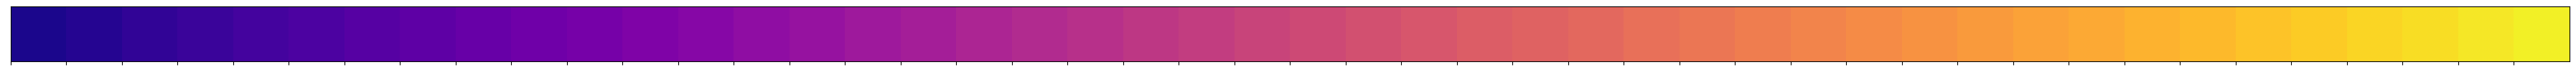

In [6]:
custom_states = sns.color_palette("plasma", 46) #as the number of states
sns.palplot(custom_states)

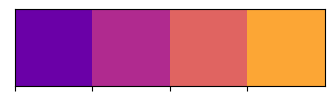

In [7]:
color_quarters = sns.color_palette("plasma", 4)
sns.palplot(color_quarters)

# Read datasets

In [12]:
root_path = Path(os.getcwd())
start_path = str(root_path)

## Preprocessing of US

In [ ]:
'''
root_path = Path(os.getcwd())
start_path = str(root_path.parent.parent)
df_US = pd.read_csv(start_path + "/data/new_data/us.csv") #index_col=0

df_US = df_US.dropna(axis=1, how='all')
df_US = df_US[df_US["Domain Category"] == "NOT SPECIFIED"]
map_periods = {
    'FIRST OF JAN': "Q1",
    'JAN THRU MAR': "Q1",
    'FIRST OF APR': "Q2",
    'APR THRU JUN': "Q2",
    'FIRST OF JUL': "Q3",
    'JUL THRU SEP': "Q3",
    'FIRST OF OCT': "Q4",
    'OCT THRU DEC': "Q4"
}
df_US['Period'] = df_US['Period'].map(map_periods)
df_US = df_US[df_US.Period.isin(['Q1', 'Q2', 'Q3', 'Q4'])]
df_US = df_US.drop(columns = ["Program", "Geo Level", "State", "watershed_code", "Commodity", "Domain", "Domain Category"])
#df_US["Data Item"].unique()

#the values need to be processed since they are saved as strings with commas
df_US.Value = df_US.Value.apply(lambda x: float(x.replace(",","")))
df_US = pd.pivot_table(df_US, values = 'Value', index = ['Year', 'Period'], columns = ['Data Item'], sort=True)
df_US.drop(columns = df_US.columns[2], inplace=True)

df_US.columns = ['colony_added', 'colony_n', 'colony_lost', 'colony_lost_pct', 'Disesases', 'Other', 'Pesticides', 'Other.pests.parasites', 'Unknown', 'Varroa.mites', 'colony_reno', 'colony_reno_pct']
#reorder the columns:
new_cols = ['colony_n', 'colony_lost', 'colony_lost_pct', 'colony_added', 'colony_reno', 'colony_reno_pct', 'Varroa.mites', 'Disesases', 'Pesticides', 'Other.pests.parasites', 'Other', 'Unknown']
df_US = df_US[new_cols]

df_US = df_US.reset_index()
df_US.rename(columns={"Year": "year", "Period": "months"}, inplace=True)
df_US.to_csv(start_path + "/data/new_data/US_ziocane.csv", index=True)
'''

In [ ]:
'''
First Preprocessing which was not useful due to wrong data

df_US.months.unique()
map_quarters = {
    'January-March': "Q1",
    'April-June': "Q2",
    'July-September': "Q3",
    'October-December': "Q4"
}
df_US['months'] = df_US['months'].map(map_quarters)
df_US.drop(columns = df_US.columns[[0,1,4,6]], inplace=True)
df_US.to_csv(start_path + "/data/new_data/data_US.csv", index=True)

#After this further preprocessing, the data from "data_US" can be used straightforward
'''

# Import already processed data

In [13]:
df_US = pd.read_csv(start_path + "/data_US.csv", index_col=0)
df_US.head()

year months  colony_n  colony_lost  colony_lost_pct  colony_added  \
0  2015     Q1   2824610       500020               18        546980   
1  2015     Q2   2849500       352860               12        661860   
2  2015     Q3   3132880       457100               15        172990   
3  2015     Q4   2874760       412380               14        117150   
4  2016     Q1   2594590       428800               17        378160   

   colony_reno  colony_reno_pct  Varroa.mites  Other.pests.parasites  \
0       270530               10          25.2                    8.6   
1       692850               24          43.4                   19.5   
2       303070               10          41.2                   17.6   
3       158790                6          37.0                   11.4   
4       158050                6          34.3                   12.6   

   Disesases  Pesticides  Other  Unknown  
0        3.1         7.4    6.9      4.3  
1        4.9        16.6   11.6      3.5  
2        8.0        15.2    8.8      4.8  
3        5.2         9.5    7.3      6.9  
4        6.2        10.5    7.0      5.4

In [14]:
df_US = df_US.groupby(["year", "months"]).sum()
df_US.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 29 entries, (2015, 'Q1') to (2022, 'Q2')
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   colony_n               29 non-null     int64  
 1   colony_lost            29 non-null     int64  
 2   colony_lost_pct        29 non-null     int64  
 3   colony_added           29 non-null     int64  
 4   colony_reno            29 non-null     int64  
 5   colony_reno_pct        29 non-null     int64  
 6   Varroa.mites           29 non-null     float64
 7   Other.pests.parasites  29 non-null     float64
 8   Disesases              29 non-null     float64
 9   Pesticides             29 non-null     float64
 10  Other                  29 non-null     float64
 11  Unknown                29 non-null     float64
dtypes: float64(6), int64(6)
memory usage: 3.0+ KB


In [17]:
df = pd.read_csv(start_path + "/final_data_bystate.csv", index_col=0)
df.head()

year months       state   colony_n  colony_max  colony_lost  \
0  2015     Q1     alabama     7000.0      7000.0       1800.0   
1  2015     Q1     arizona    35000.0     35000.0       4600.0   
2  2015     Q1    arkansas    13000.0     14000.0       1500.0   
3  2015     Q1  california  1440000.0   1690000.0     255000.0   
4  2015     Q1    colorado     3500.0     12500.0       1500.0   

   colony_lost_pct  colony_added  colony_reno  colony_reno_pct  Varroa.mites  \
0               26          2800        250.0                4          10.0   
1               13          3400       2100.0                6          26.9   
2               11          1200         90.0                1          17.6   
3               15        250000     124000.0                7          24.7   
4               12           200        140.0                1          14.6   

   Other.pests.parasites  Disesases  Pesticides  Other  Unknown  
0                    5.4        0.0         2.2    9.1      9.4  
1                   20.5        0.1         0.0    1.8      3.1  
2                   11.4        1.5         3.4    1.0      1.0  
3                    7.2        3.0         7.5    6.5      2.8  
4                    0.9        1.8         0.6    2.6      5.9

In [18]:
df.loc[np.logical_and(df["year"]==2015, df["months"]=="Q1"),"Unknown"].mean()

5.004347826086957

**Problem**: Why does the mean of the stressors in a trimester over all the states does not equal to the value of the stressor for the trimester in US?

In [ ]:
'''
#preprocessing to perform after the preprocessing done to "data_bees.csv" in "main.Rmd"
#--> which led to "cleaned_by_state.csv"

map_quarters2 = {
    'JAN THRU MAR': "Q1",
    'APR THRU JUN': "Q2",
    'JUL THRU SEP': "Q3",
    'OCT THRU DEC': "Q4"
}
df['Period'] = df['Period'].map(map_quarters2)
df.State = df.State.apply(lambda x: x.lower())
df.rename(columns = {"Year": "year", "Period": "months", "State": "state"}, inplace=True)
df = df.set_index(['year', 'months', 'state'])
df.sort_index(inplace=True)
#df_US.columns
df.drop(df.columns[[0, 3]], axis=1, inplace=True)
df.columns = ['colony_added', 'colony_max', 'colony_lost', 'colony_lost_pct', 'Disesases', 'Other', 'Pesticides', 'Other.pests.parasites', 'Unknown', 'Varroa.mites', 'colony_reno', 'colony_reno_pct', 'colony_n']
cols = df_US.columns.tolist()
cols.insert(1, "colony_max")
print(cols)
df = df[cols] #reorder the columns of df to match the ones of df_US + colony_max
df = df.reset_index()
df.to_csv(start_path + "/data/new_data/final_data_bystate.csv", index=True)
'''

In [19]:
df_years = df.set_index(["year", "months", "state"])
df_years.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1334 entries, (2015, 'Q1', 'alabama') to (2022, 'Q2', 'wyoming')
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   colony_n               1334 non-null   float64
 1   colony_max             1334 non-null   float64
 2   colony_lost            1334 non-null   float64
 3   colony_lost_pct        1334 non-null   int64  
 4   colony_added           1334 non-null   int64  
 5   colony_reno            1334 non-null   float64
 6   colony_reno_pct        1334 non-null   int64  
 7   Varroa.mites           1334 non-null   float64
 8   Other.pests.parasites  1334 non-null   float64
 9   Disesases              1334 non-null   float64
 10  Pesticides             1334 non-null   float64
 11  Other                  1334 non-null   float64
 12  Unknown                1334 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 141.5+ KB


## Transform the stressors in absolute values

In [20]:
df.head()

year months       state   colony_n  colony_max  colony_lost  \
0  2015     Q1     alabama     7000.0      7000.0       1800.0   
1  2015     Q1     arizona    35000.0     35000.0       4600.0   
2  2015     Q1    arkansas    13000.0     14000.0       1500.0   
3  2015     Q1  california  1440000.0   1690000.0     255000.0   
4  2015     Q1    colorado     3500.0     12500.0       1500.0   

   colony_lost_pct  colony_added  colony_reno  colony_reno_pct  Varroa.mites  \
0               26          2800        250.0                4          10.0   
1               13          3400       2100.0                6          26.9   
2               11          1200         90.0                1          17.6   
3               15        250000     124000.0                7          24.7   
4               12           200        140.0                1          14.6   

   Other.pests.parasites  Disesases  Pesticides  Other  Unknown  
0                    5.4        0.0         2.2    9.1      9.4  
1                   20.5        0.1         0.0    1.8      3.1  
2                   11.4        1.5         3.4    1.0      1.0  
3                    7.2        3.0         7.5    6.5      2.8  
4                    0.9        1.8         0.6    2.6      5.9

In [21]:
df_abs_stress = df.copy()
for col in df.columns[10:]:
    df_abs_stress[col] = df_abs_stress[col]/100*df_abs_stress.colony_max
    df_abs_stress[col] = round(df_abs_stress[col],2)
df_abs_stress.head()

year months       state   colony_n  colony_max  colony_lost  \
0  2015     Q1     alabama     7000.0      7000.0       1800.0   
1  2015     Q1     arizona    35000.0     35000.0       4600.0   
2  2015     Q1    arkansas    13000.0     14000.0       1500.0   
3  2015     Q1  california  1440000.0   1690000.0     255000.0   
4  2015     Q1    colorado     3500.0     12500.0       1500.0   

   colony_lost_pct  colony_added  colony_reno  colony_reno_pct  Varroa.mites  \
0               26          2800        250.0                4         700.0   
1               13          3400       2100.0                6        9415.0   
2               11          1200         90.0                1        2464.0   
3               15        250000     124000.0                7      417430.0   
4               12           200        140.0                1        1825.0   

   Other.pests.parasites  Disesases  Pesticides     Other  Unknown  
0                  378.0        0.0       154.0     637.0    658.0  
1                 7175.0       35.0         0.0     630.0   1085.0  
2                 1596.0      210.0       476.0     140.0    140.0  
3               121680.0    50700.0    126750.0  109850.0  47320.0  
4                  112.5      225.0        75.0     325.0    737.5

In [24]:
df_abs_stress.to_csv(start_path + "/final_data_stressor_abs.csv")
df_abs_stress.loc[1,"Varroa.mites"]

9415.0

In [25]:
df_abs_stress.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1334 entries, 0 to 1333
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   1334 non-null   int64  
 1   months                 1334 non-null   object 
 2   state                  1334 non-null   object 
 3   colony_n               1334 non-null   float64
 4   colony_max             1334 non-null   float64
 5   colony_lost            1334 non-null   float64
 6   colony_lost_pct        1334 non-null   int64  
 7   colony_added           1334 non-null   int64  
 8   colony_reno            1334 non-null   float64
 9   colony_reno_pct        1334 non-null   int64  
 10  Varroa.mites           1334 non-null   float64
 11  Other.pests.parasites  1334 non-null   float64
 12  Disesases              1334 non-null   float64
 13  Pesticides             1334 non-null   float64
 14  Other                  1334 non-null   float64
 15  Unkn

## Merge with temperature and precipitation data

In [28]:
df_temp_prec = pd.read_csv(start_path + "/temp_prec_trimesters.csv")

In [ ]:
df_temp_prec.head(100)

In [30]:
map_quarters3 = {
    'January-March': "Q1",
    'April-June': "Q2",
    'July-September': "Q3",
    'October-December': "Q4"
}
df_temp_prec['months'] = df_temp_prec['months'].map(map_quarters3)
df_temp_prec.state = df_temp_prec.state.apply(lambda x: x.lower())
df_temp_prec = df_temp_prec.set_index(['year', 'months', 'state'])
df_temp_prec.sort_index(inplace=True)

In [31]:
df_temp_prec.head()

MaximumTemperature  MinimumTemperature  \
year months state                                                
2015 Q1     alabama                  20.44               -1.11   
            alaska                   -4.00              -17.33   
            arizona                  21.44                0.67   
            arkansas                 15.11               -3.28   
            california               21.22                3.28   

                        PalmerDroughtSeverityIndexPDSI  Precipitation  \
year months state                                                       
2015 Q1     alabama                          -0.870000       4.223333   
            alaska                           -2.123333       2.423333   
            arizona                          -2.123333       1.183333   
            arkansas                         -0.090000       4.896667   
            california                       -5.123333       1.430000   

                        AverageTemperature  
year months state                           
2015 Q1     alabama                   8.65  
            alaska                  -11.19  
            arizona                  10.63  
            arkansas                  5.26  
            california               11.61

In [32]:
df_years.head()

colony_n  colony_max  colony_lost  colony_lost_pct  \
year months state                                                             
2015 Q1     alabama        7000.0      7000.0       1800.0               26   
            arizona       35000.0     35000.0       4600.0               13   
            arkansas      13000.0     14000.0       1500.0               11   
            california  1440000.0   1690000.0     255000.0               15   
            colorado       3500.0     12500.0       1500.0               12   

                        colony_added  colony_reno  colony_reno_pct  \
year months state                                                    
2015 Q1     alabama             2800        250.0                4   
            arizona             3400       2100.0                6   
            arkansas            1200         90.0                1   
            california        250000     124000.0                7   
            colorado             200        140.0                1   

                        Varroa.mites  Other.pests.parasites  Disesases  \
year months state                                                        
2015 Q1     alabama             10.0                    5.4        0.0   
            arizona             26.9                   20.5        0.1   
            arkansas            17.6                   11.4        1.5   
            california          24.7                    7.2        3.0   
            colorado            14.6                    0.9        1.8   

                        Pesticides  Other  Unknown  
year months state                                   
2015 Q1     alabama            2.2    9.1      9.4  
            arizona            0.0    1.8      3.1  
            arkansas           3.4    1.0      1.0  
            california         7.5    6.5      2.8  
            colorado           0.6    2.6      5.9

In [33]:
#df_final = pd.merge(df_years, df_temp_prec, how="outer", left_index=True, right_index=True)
#df_final

In [27]:
#len(df_final.index.levels[2]) #'Hawaii' and 'Other States' are not present here since there are no temperature and
#precipitations data

In [ ]:
df_final = pd.merge(df_years, df_temp_prec, how="left", left_index=True, right_index=True)
df_final

In [35]:
len(df_final.index.levels[2]) #'Hawaii' and 'Other States' are preserved keeping NaN values for temperatures
#and precipitations

46

In [30]:
#df_final.to_csv(start_path + "/data/new_data/data_bystate_temp_perc.csv")

## Features Interpretation

**Reference**: <br>
The questionnaire can be viewed here: https://www.nass.usda.gov/Publications/Methodology_and_Data_Quality/Honey_Bee_Colonies/08_2022/July%202022%20QCL.pdf <br>
That is a link to the questionnaire for the July quarter. Similar questionnaires are used in October and then the following January and April, with the only difference being the year and month used in the questions.
 
Max colonies is calculated in the summary. While some colonies in the U.S. are primarily honey producing colonies and usually remain in one state, other colonies are primarily used for pollination purposes. Pollinating colonies are moved from state to state throughout the year following the crops that need to be pollinated. Therefore, the maximum number of colonies in a state can vary widely during a quarter and throughout the year. For example, on an individual record level an operation could not have any colonies in North Dakota at the beginning of a quarter because all of their colonies are in California for almond pollination. But during the middle of the quarter the almond pollination season ends and the colonies are moved back to North Dakota. So while the January 1 colony number might be zero, the max colony number during the January – March quarter could be 1,000.
 
The record level data is processed in a summary which also deals with non-response through a weighting procedure and the state level indications are created.
 
Colonies renovated are not included in the calculation for the next quarter’s starting inventory.
 
As you can see on the questionnaire linked above, beginning and ending inventory is asked on the survey. Ending inventory is generally considered one of the stronger indications due to memory bias of remembering facts from three months ago and what happened during those three months.
 
At the state level the calculation is as follows: Max colonies – Lost Colonies + Added Colonies  = Beginning Inventory of next quarter, assuming no colonies were moved out of state. However, because colonies can move out of state before the start of the next quarter, it means that the starting inventory can be much lower. If no colonies are moved out of state, then the calculation above should be within 2% of the starting inventory of the following quarter. At the national level, the maximum colony value is not calculated as colonies are not sent across borders for pollinating. Therefore the calculation is First of the Quarter Inventory – Lost + Added = (+/-1%) Beginning Inventory.

# Analysis of US data

In [31]:
# df_US.index --> "2019-Q2" missing because of missing data

In [36]:
df_US[df_US.colony_lost < df_US.colony_added]

colony_n  colony_lost  colony_lost_pct  colony_added  \
year months                                                         
2015 Q1       2824610       500020               18        546980   
     Q2       2849500       352860               12        661860   
2016 Q2       2801470       329820               12        736920   
2017 Q1       2615590       361850               14        586240   
     Q2       2886030       225680                8        653470   
2018 Q1       2631220       425220               16        512940   
     Q2       2692660       270000               10        725650   
2020 Q1       2876100       399570               14        477200   
     Q2       2982900       252630                8        596860   
2021 Q2       2855070       255860                9        677690   
2022 Q1       2875770       331780               12        367890   
     Q2       2921590       282630               10        589630   

             colony_reno  colony_reno_pct  Varroa.mites  \
year months                                               
2015 Q1           270530               10          25.2   
     Q2           692850               24          43.4   
2016 Q2           561160               20          53.4   
2017 Q1           239580                9          42.2   
     Q2           806170               28          41.6   
2018 Q1           288750               11          40.8   
     Q2           715110               27          53.4   
2020 Q1           153390                5          25.5   
     Q2           632680               21          42.3   
2021 Q2           480380               17          48.7   
2022 Q1           187180                7          33.7   
     Q2           492410               17          45.2   

             Other.pests.parasites  Disesases  Pesticides  Other  Unknown  
year months                                                                
2015 Q1                        8.6        3.1         7.4    6.9      4.3  
     Q2                       19.5        4.9        16.6   11.6      3.5  
2016 Q2                       16.3        9.5        12.4   12.3      4.1  
2017 Q1                       15.6        7.1         8.9    7.2      7.4  
     Q2                       11.7        4.3        12.9    6.6      4.4  
2018 Q1                       12.7        4.3        10.3    8.7      7.2  
     Q2                       19.0       11.4        13.0   14.4      9.1  
2020 Q1                        8.0        4.4         5.0    5.6      5.4  
     Q2                       12.2        5.5         6.1   10.8      5.2  
2021 Q2                       12.8        5.5        12.3   11.3      3.9  
2022 Q1                        8.4        2.5         5.8    4.5      4.2  
     Q2                       21.2        3.9         6.7   15.1      3.5

**Conclusion**: <br>
The values of colony added is bigger than colony lost in almost every Q1 and Q2, and never in Q3 and Q4, so the most of the colonies are added in the first half of the year.

In [37]:
df_US[df_US.colony_reno > df_US.colony_lost]

colony_n  colony_lost  colony_lost_pct  colony_added  \
year months                                                         
2015 Q2       2849500       352860               12        661860   
2016 Q2       2801470       329820               12        736920   
2017 Q2       2886030       225680                8        653470   
     Q3       2994500       394810               13        284370   
2018 Q2       2692660       270000               10        725650   
     Q3       2958790       377120               13        263560   
2020 Q2       2982900       252630                8        596860   
2021 Q2       2855070       255860                9        677690   
2022 Q2       2921590       282630               10        589630   

             colony_reno  colony_reno_pct  Varroa.mites  \
year months                                               
2015 Q2           692850               24          43.4   
2016 Q2           561160               20          53.4   
2017 Q2           806170               28          41.6   
     Q3           449550               15          45.5   
2018 Q2           715110               27          53.4   
     Q3           420780               14          53.8   
2020 Q2           632680               21          42.3   
2021 Q2           480380               17          48.7   
2022 Q2           492410               17          45.2   

             Other.pests.parasites  Disesases  Pesticides  Other  Unknown  
year months                                                                
2015 Q2                       19.5        4.9        16.6   11.6      3.5  
2016 Q2                       16.3        9.5        12.4   12.3      4.1  
2017 Q2                       11.7        4.3        12.9    6.6      4.4  
     Q3                       15.0        4.8        10.9   11.6      4.9  
2018 Q2                       19.0       11.4        13.0   14.4      9.1  
     Q3                       15.2        6.4        15.7   13.9      4.7  
2020 Q2                       12.2        5.5         6.1   10.8      5.2  
2021 Q2                       12.8        5.5        12.3   11.3      3.9  
2022 Q2                       21.2        3.9         6.7   15.1      3.5

**Conclusion**: <br>
Colonies renovated are not included in colonies lost since there are some trimesters where the first value is higher than the latter. <br>
In particular, the quarter when this happens is almost always the Q2.

In [38]:
print("sum of colony lost along the years: ", df_US.colony_lost.sum())
print("sum of colony added along the years: ", df_US.colony_added.sum())

sum of colony lost along the years:  10963080
sum of colony added along the years:  11066360


**Conclusion**: <br>
Over the years of the analysis, the number of colonies lost is more than the added ones, so we expect an increase of colonies from 2015 to 2022. But it is not like that... see below

In [39]:
df_US.loc[(2022, "Q2"), "colony_n"] < df_US.loc[(2015, "Q1"), "colony_n"]

False

<AxesSubplot: title={'center': 'Number of colonies lost, added and renovated along time in US'}, xlabel='year,months', ylabel='Number of colonies'>

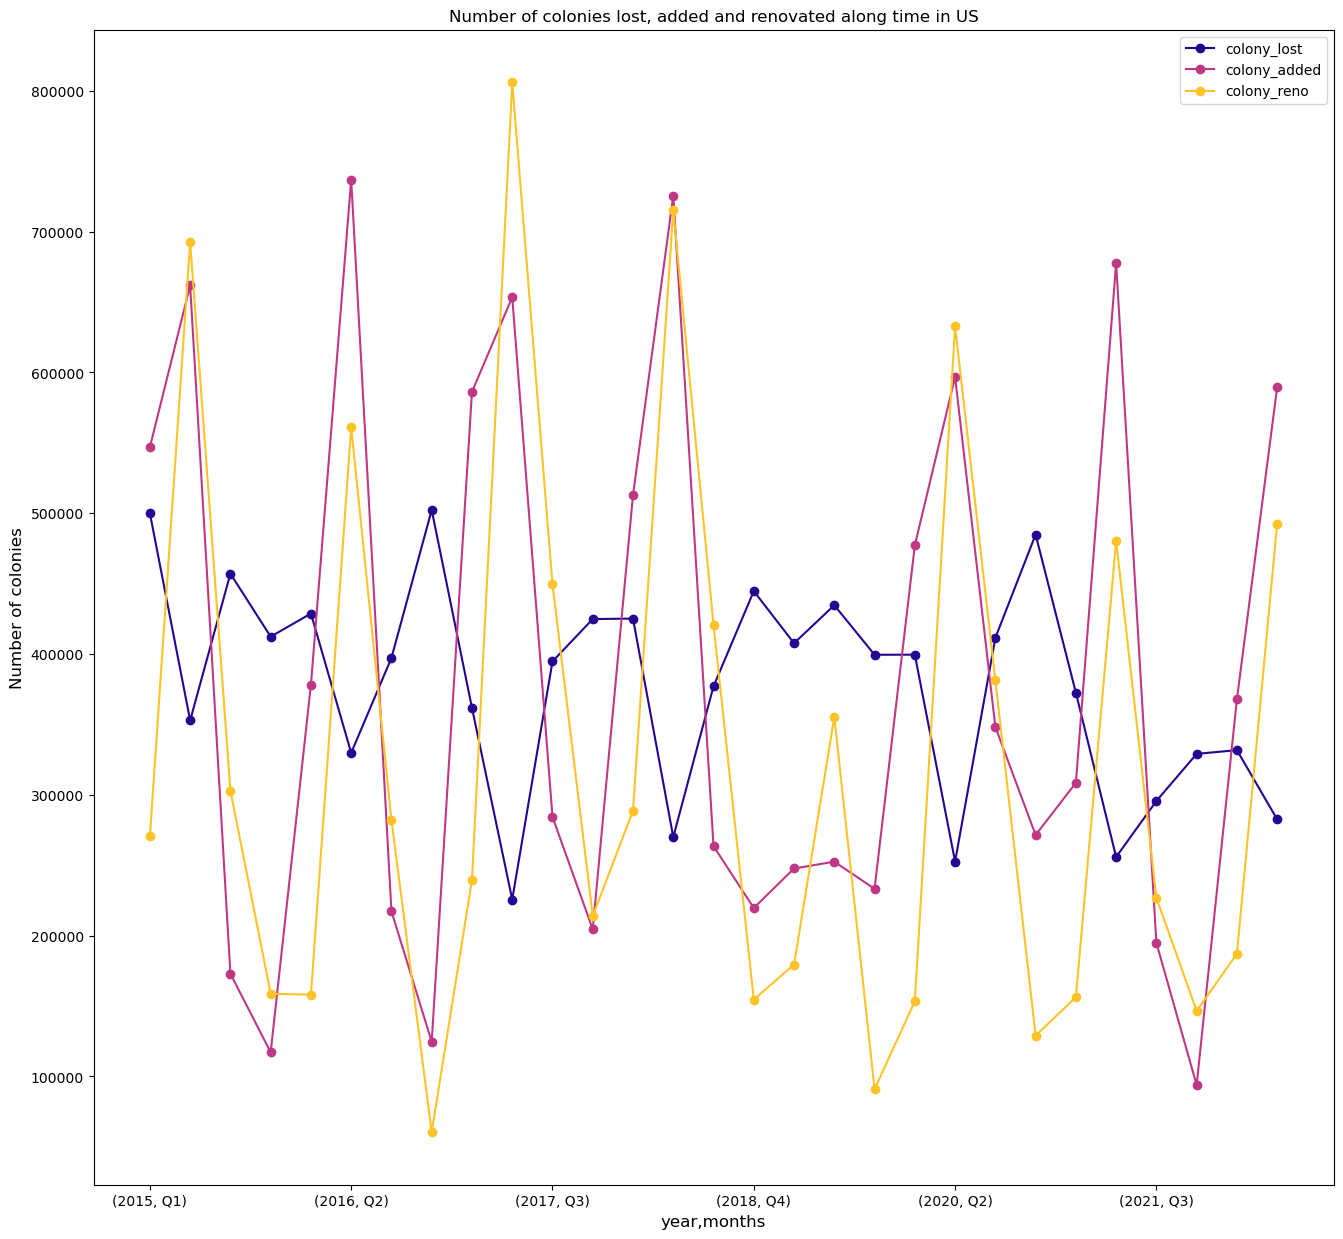

In [40]:
fig, ax = plt.subplots(figsize=(16,15))
plt.title('Number of colonies lost, added and renovated along time in US')
plt.ylabel('Number of colonies')
df_US[["colony_lost", "colony_added", "colony_reno"]].plot(ax=ax, marker="o", color=[custom_states[i] for i in [1,20,40]])

In [41]:
df_US_new = df_US.copy()
df_US_new["colony_end"] = df_US_new["colony_n"].shift(-1)
df_US_new["colony_end_computed"] = df_US_new["colony_n"] + df_US_new["colony_added"] - df_US_new["colony_lost"]
df_US_new["diff"] = df_US_new["colony_end_computed"]-df_US_new["colony_end"]
df_US_new["diff_pct"] = df_US_new["diff"]*100/df_US_new["colony_end"]
df_US_new.loc[(2019,"Q1"), ["diff", "diff_pct"]] = [0,0]
df_US_new

colony_n  colony_lost  colony_lost_pct  colony_added  \
year months                                                         
2015 Q1       2824610       500020               18        546980   
     Q2       2849500       352860               12        661860   
     Q3       3132880       457100               15        172990   
     Q4       2874760       412380               14        117150   
2016 Q1       2594590       428800               17        378160   
     Q2       2801470       329820               12        736920   
     Q3       3181180       397290               12        217320   
     Q4       3032060       502350               17        124660   
2017 Q1       2615590       361850               14        586240   
     Q2       2886030       225680                8        653470   
     Q3       2994500       394810               13        284370   
     Q4       2849770       424860               15        204510   
2018 Q1       2631220       425220               16        512940   
     Q2       2692660       270000               10        725650   
     Q3       2958790       377120               13        263560   
     Q4       2868970       444730               16        219640   
2019 Q1       2671470       407700               15        247710   
     Q3       3175960       434700               14        252550   
     Q4       3018110       399510               13        233260   
2020 Q1       2876100       399570               14        477200   
     Q2       2982900       252630                8        596860   
     Q3       3175330       411490               13        348280   
     Q4       3135340       484920               15        271500   
2021 Q1       2923240       372630               13        308530   
     Q2       2855070       255860                9        677690   
     Q3       3173390       295660                9        194900   
     Q4       3091790       329110               11         93940   
2022 Q1       2875770       331780               12        367890   
     Q2       2921590       282630               10        589630   

             colony_reno  colony_reno_pct  Varroa.mites  \
year months                                               
2015 Q1           270530               10          25.2   
     Q2           692850               24          43.4   
     Q3           303070               10          41.2   
     Q4           158790                6          37.0   
2016 Q1           158050                6          34.3   
     Q2           561160               20          53.4   
     Q3           282130                9          46.1   
     Q4            60390                2          46.6   
2017 Q1           239580                9          42.2   
     Q2           806170               28          41.6   
     Q3           449550               15          45.5   
     Q4           213990                8          55.3   
2018 Q1           288750               11          40.8   
     Q2           715110               27          53.4   
     Q3           420780               14          53.8   
     Q4           154560                5          50.5   
2019 Q1           179500                7          45.6   
     Q3           355330               11          44.1   
     Q4            91000                3          45.7   
2020 Q1           153390                5          25.5   
     Q2           632680               21          42.3   
     Q3           381620               12          55.7   
     Q4           128990                4          48.6   
2021 Q1           156270                5          31.3   
     Q2           480380               17          48.7   
     Q3           226820                7          38.0   
     Q4           146520                5          33.6   
2022 Q1           187180                7          33.7   
     Q2           492410               17          45.2   

             Other.pests.parasites  Disesas

<AxesSubplot: title={'center': 'Number of differences in colonies along time in US for each quarter'}, xlabel='year', ylabel='Differences in colonies'>

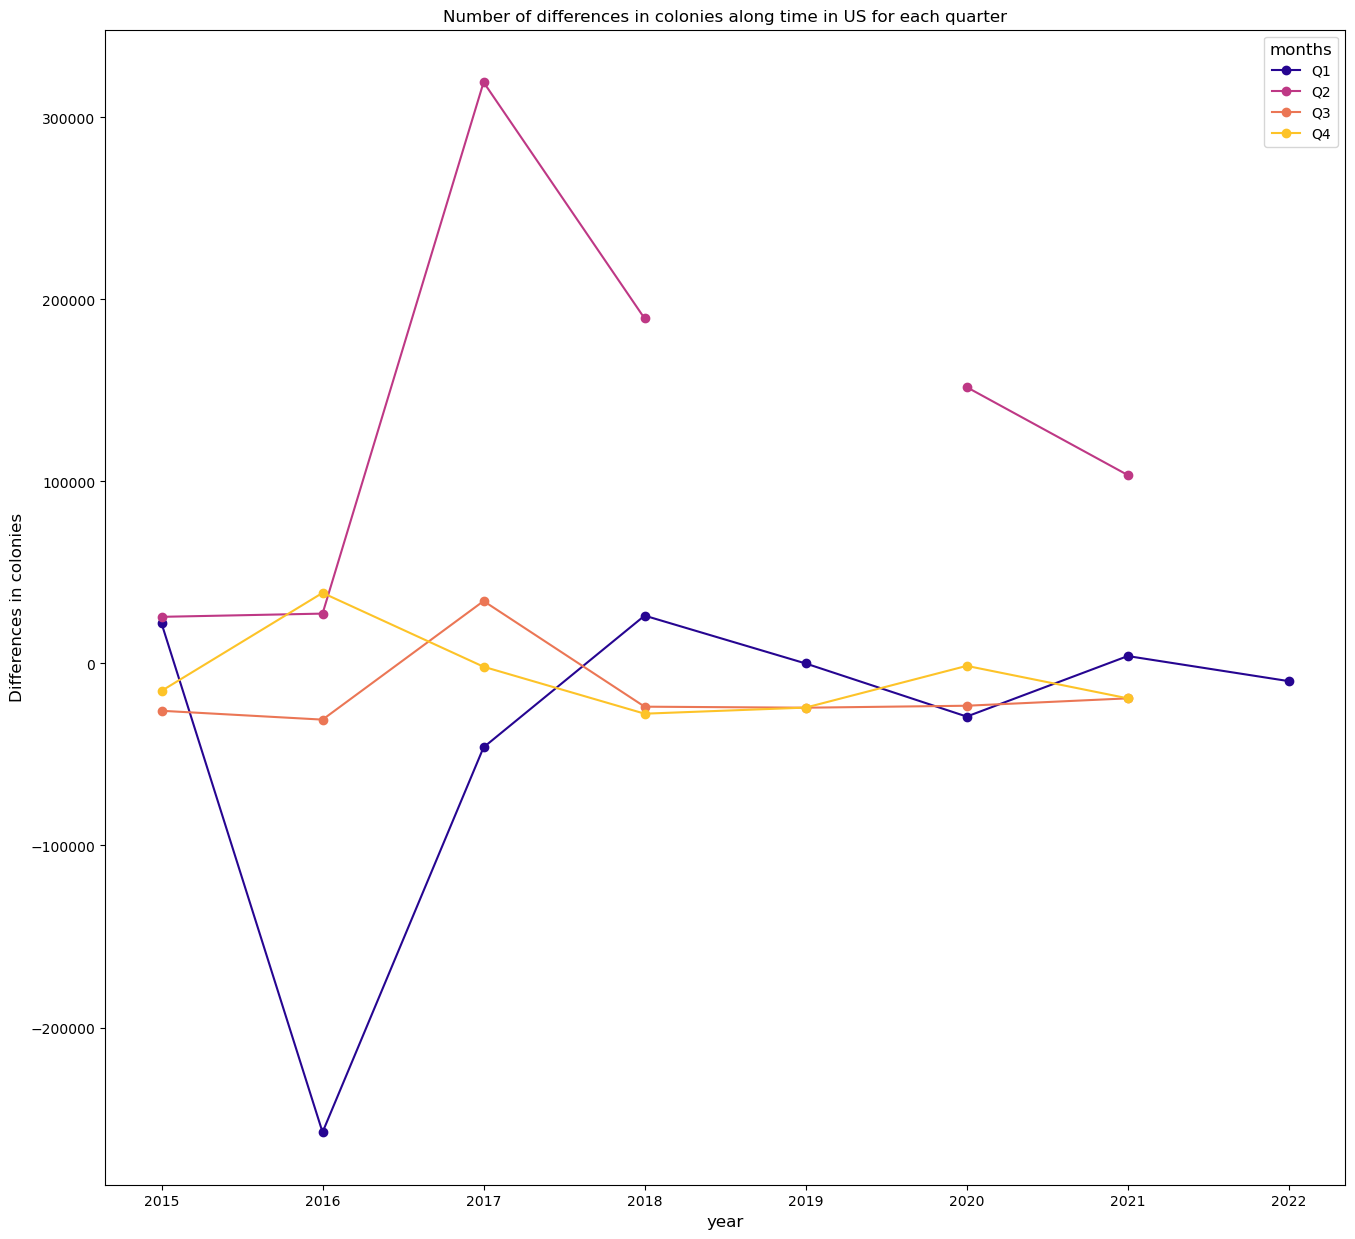

In [42]:
fig, ax = plt.subplots(figsize=(16,15))
plt.title('Number of differences in colonies along time in US for each quarter')
plt.ylabel('Differences in colonies')
df_US_new["diff"].unstack().plot(ax=ax, marker="o", color=[custom_states[i] for i in [1,20,30,40]])

<AxesSubplot: title={'center': 'Stressors along time in US for each quarter'}, xlabel='year,months', ylabel='Stressors percentage'>

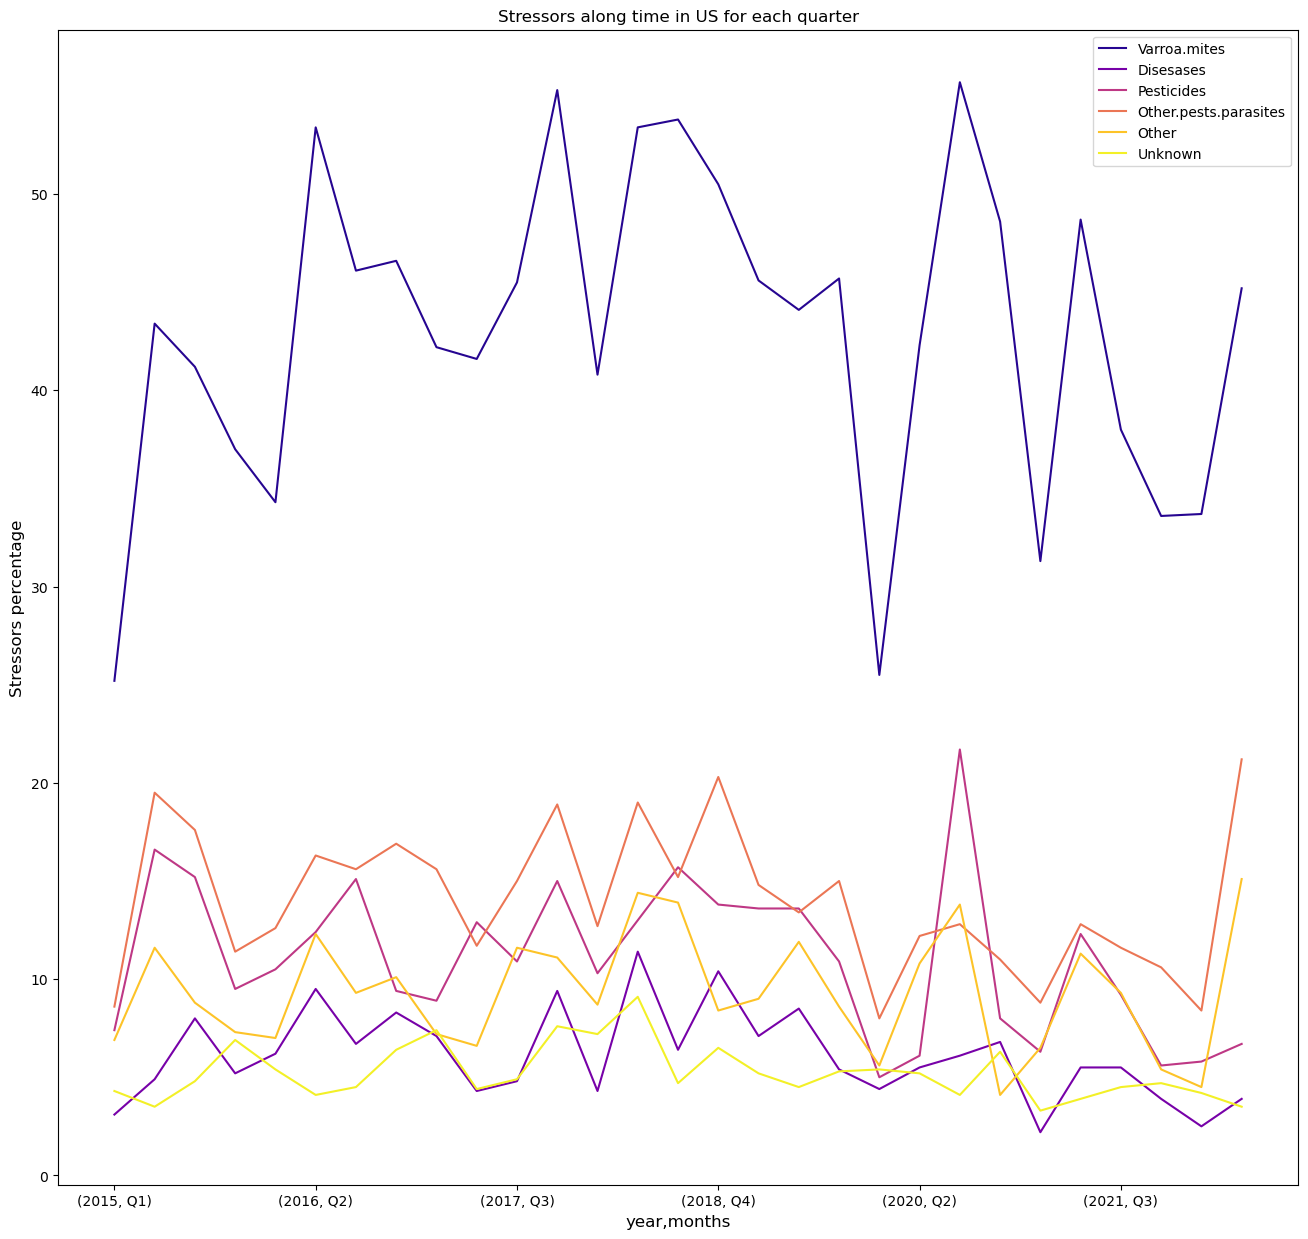

In [43]:
df_US_stressors = df_US[["Varroa.mites", "Disesases", "Pesticides", "Other.pests.parasites", "Other", "Unknown"]]
fig, ax = plt.subplots(figsize=(16,15))
plt.title('Stressors along time in US for each quarter')
plt.ylabel('Stressors percentage')
df_US_stressors.plot(ax=ax, color=[custom_states[i] for i in [1,10,20,30,40,45]])

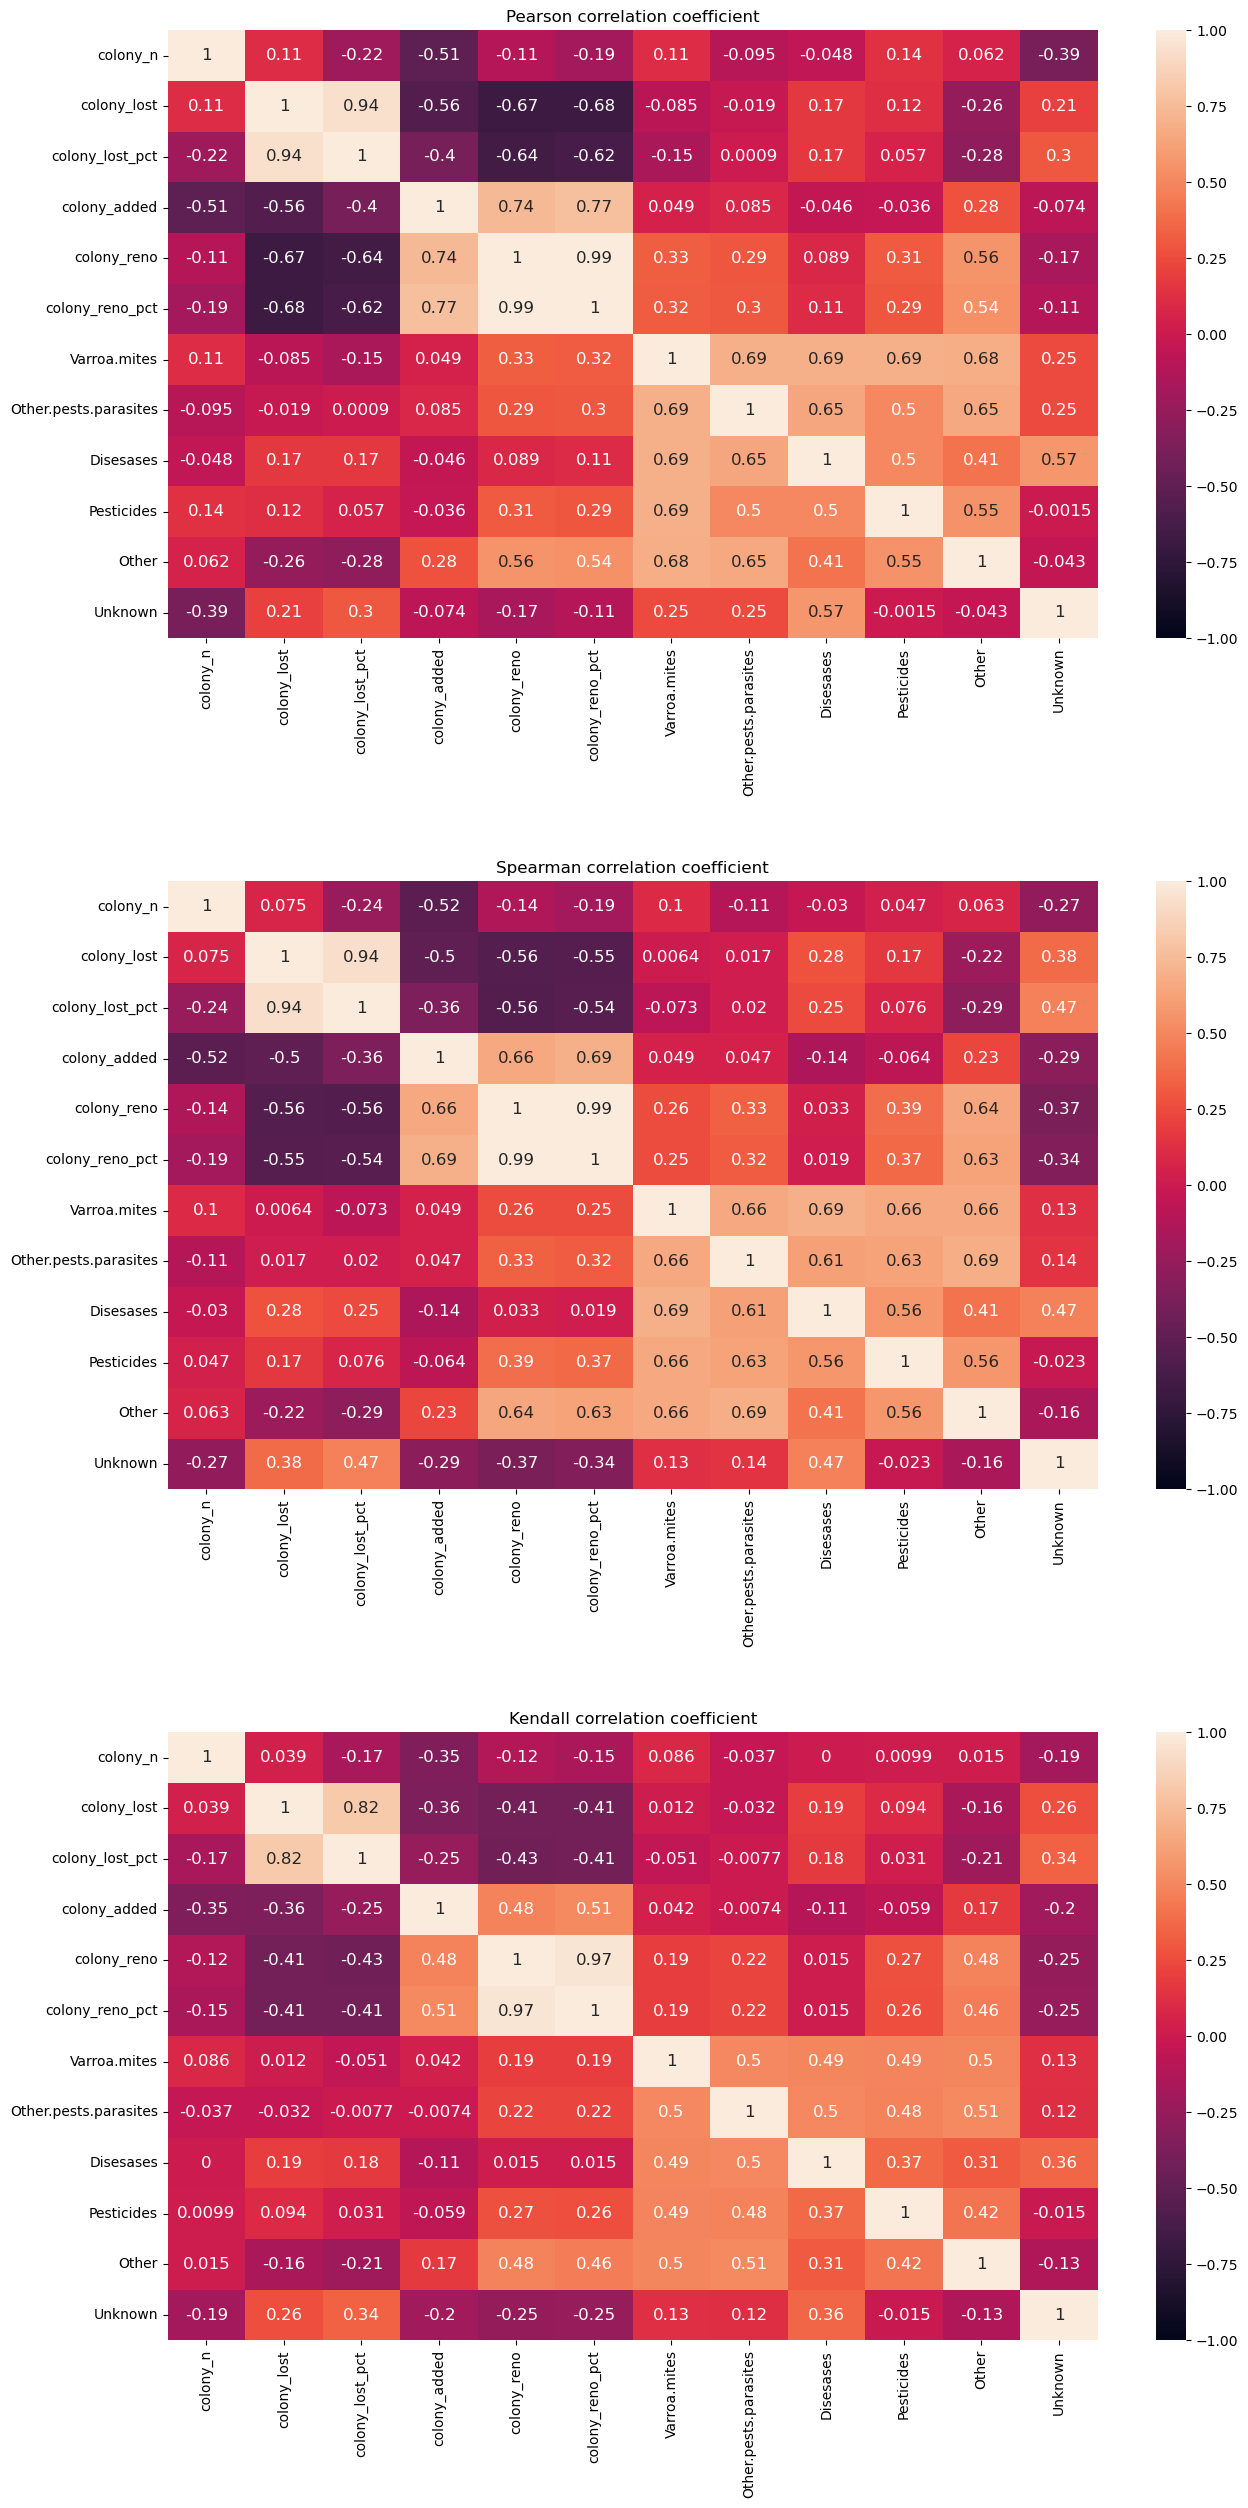

In [44]:
fig, ax = plt.subplots(3, 1, figsize=(15, 30))
plt.subplots_adjust(hspace=0.4)
sns.heatmap(df_US.corr(), annot=True, vmin=-1, vmax=1, ax=ax[0])
ax[0].set_title('Pearson correlation coefficient')
sns.heatmap(df_US.corr(method="spearman"), annot=True, vmin=-1, vmax=1, ax=ax[1])
ax[1].set_title("Spearman correlation coefficient")
sns.heatmap(df_US.corr(method="kendall"), annot=True, vmin=-1, vmax=1, ax=ax[2])
ax[2].set_title('Kendall correlation coefficient')
plt.show()

Correlations in winter

In [45]:
df_US_winter = df_US.loc[(slice(None),("Q1","Q4"),slice(None)),:]
df_US_winter.head()

colony_n  colony_lost  colony_lost_pct  colony_added  \
year months                                                         
2015 Q1       2824610       500020               18        546980   
     Q4       2874760       412380               14        117150   
2016 Q1       2594590       428800               17        378160   
     Q4       3032060       502350               17        124660   
2017 Q1       2615590       361850               14        586240   

             colony_reno  colony_reno_pct  Varroa.mites  \
year months                                               
2015 Q1           270530               10          25.2   
     Q4           158790                6          37.0   
2016 Q1           158050                6          34.3   
     Q4            60390                2          46.6   
2017 Q1           239580                9          42.2   

             Other.pests.parasites  Disesases  Pesticides  Other  Unknown  
year months                                                                
2015 Q1                        8.6        3.1         7.4    6.9      4.3  
     Q4                       11.4        5.2         9.5    7.3      6.9  
2016 Q1                       12.6        6.2        10.5    7.0      5.4  
     Q4                       16.9        8.3         9.4   10.1      6.4  
2017 Q1                       15.6        7.1         8.9    7.2      7.4

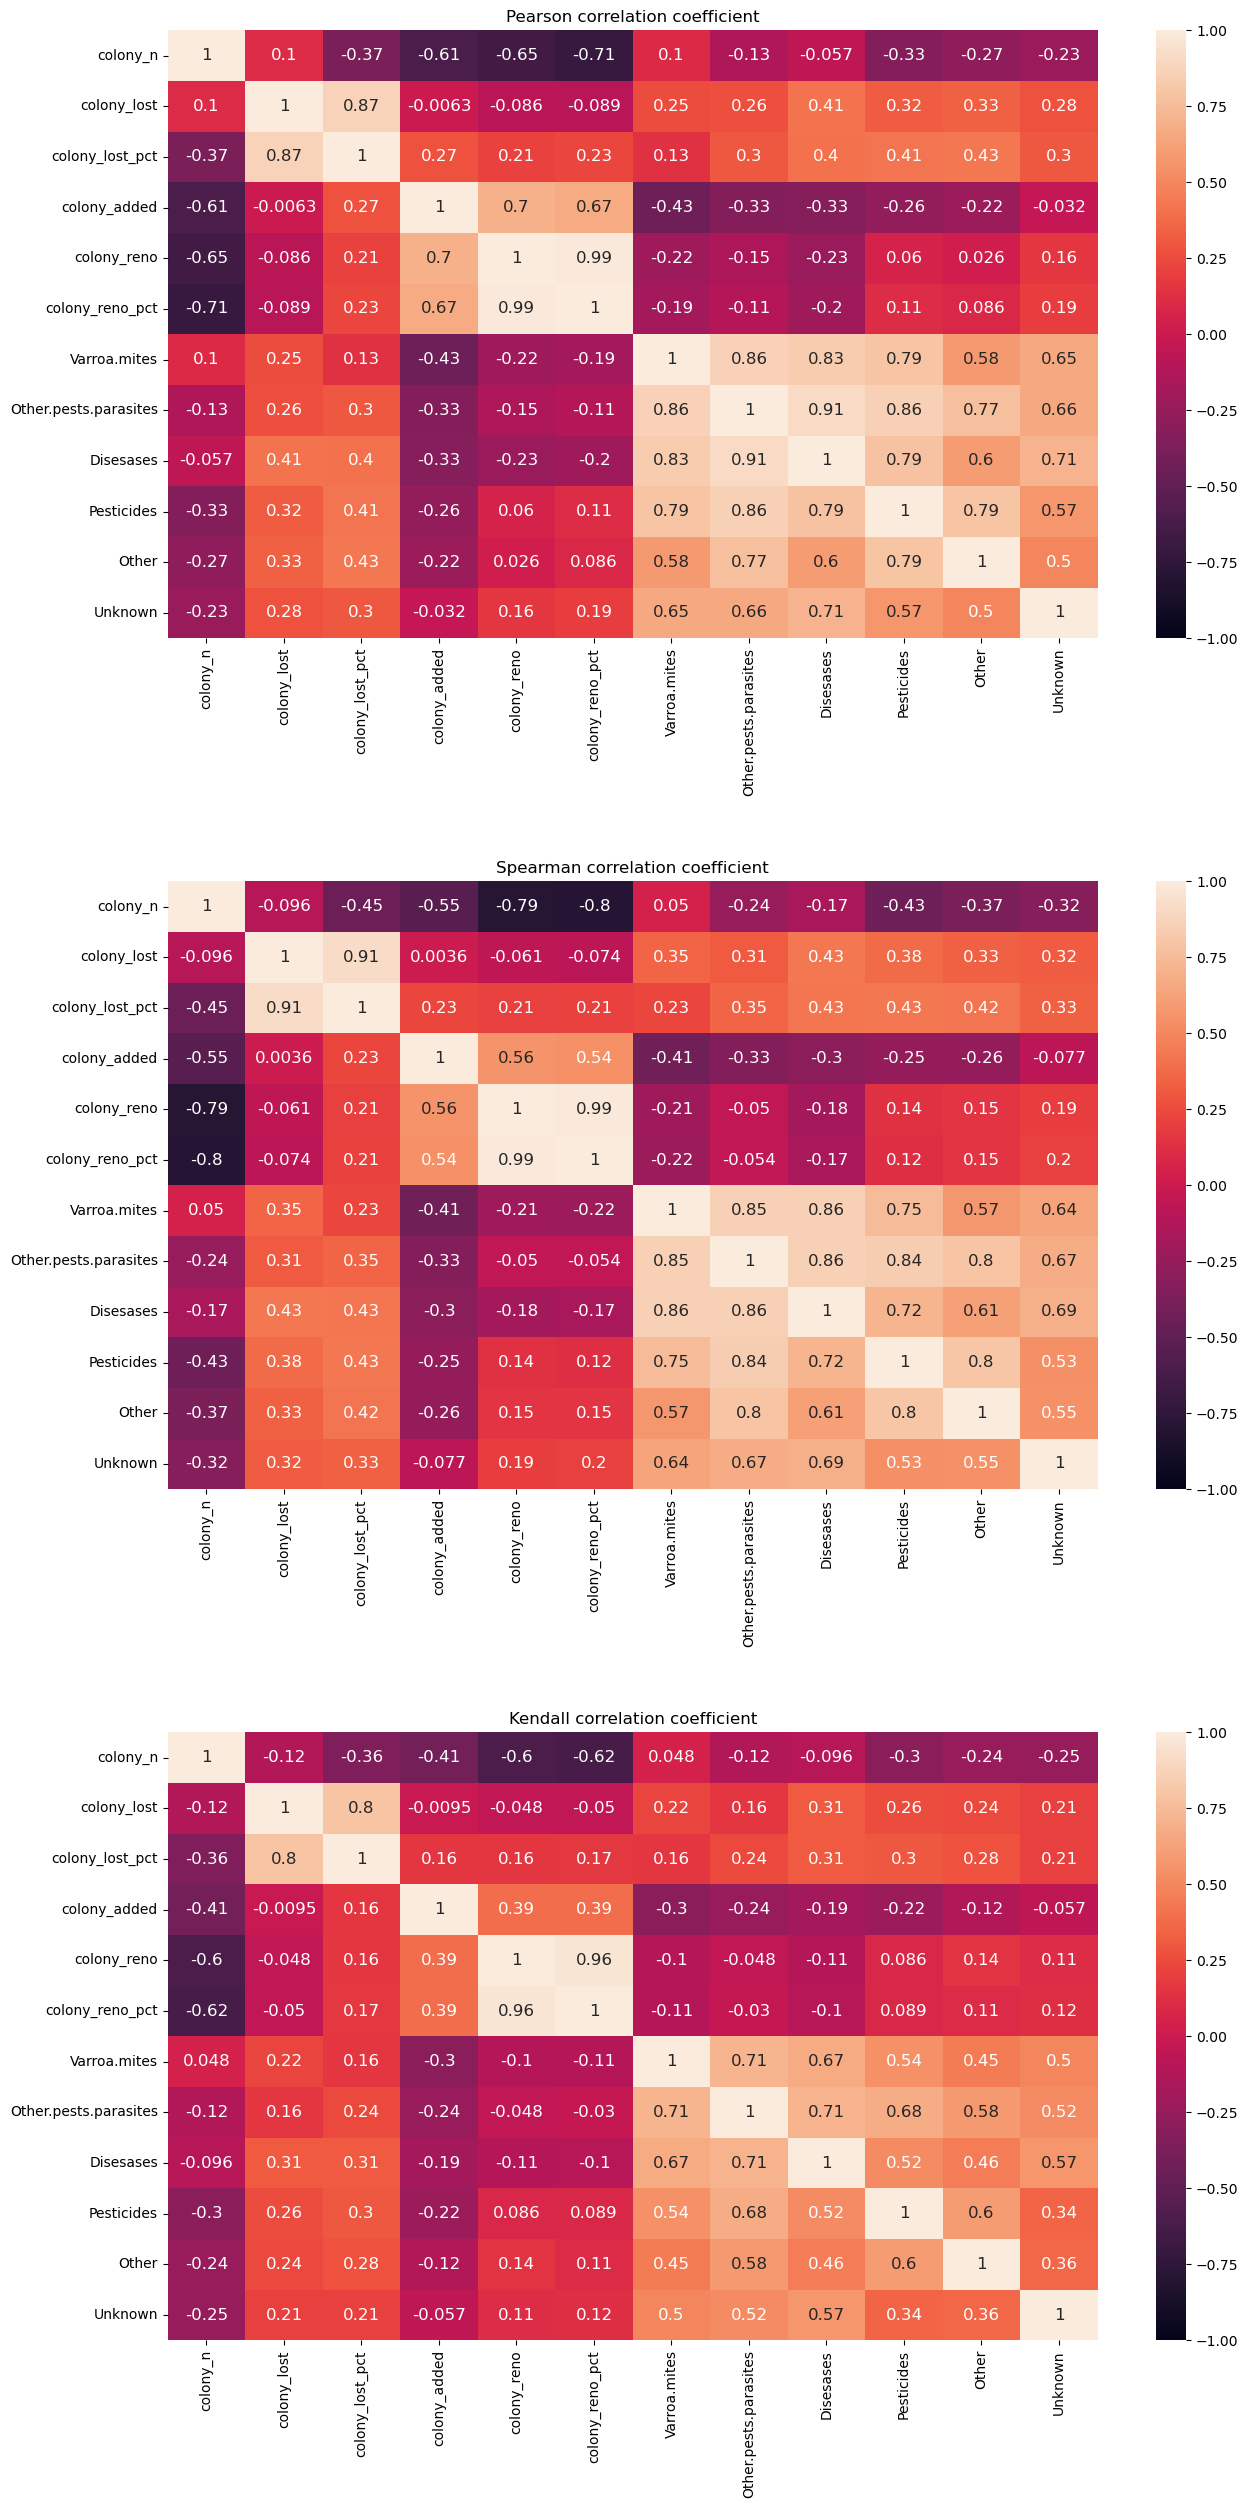

In [46]:
fig, ax = plt.subplots(3, 1, figsize=(15, 30))
plt.subplots_adjust(hspace=0.4)
sns.heatmap(df_US_winter.corr(), annot=True, vmin=-1, vmax=1, ax=ax[0])
ax[0].set_title('Pearson correlation coefficient')
sns.heatmap(df_US_winter.corr(method="spearman"), annot=True, vmin=-1, vmax=1, ax=ax[1])
ax[1].set_title("Spearman correlation coefficient")
sns.heatmap(df_US_winter.corr(method="kendall"), annot=True, vmin=-1, vmax=1, ax=ax[2])
ax[2].set_title('Kendall correlation coefficient')
plt.show()

Correlations in Summer

In [43]:
df_US_summer = df_US.loc[(slice(None),("Q2","Q3"),slice(None)),:]
df_US_summer.head()

colony_n  colony_lost  colony_lost_pct  colony_added  \
year months                                                          
2015 Q2      2849500.0     352860.0             12.0      661860.0   
     Q3      3132880.0     457100.0             15.0      172990.0   
2016 Q2      2801470.0     329820.0             12.0      736920.0   
     Q3      3181180.0     397290.0             12.0      217320.0   
2017 Q2      2694150.0     285590.0             11.0      613360.0   

             colony_reno  colony_reno_pct  Varroa.mites  Disesases  \
year months                                                          
2015 Q2         692850.0             24.0          43.4        4.9   
     Q3         303070.0             10.0          41.2        8.0   
2016 Q2         561160.0             20.0          53.4        9.5   
     Q3         282130.0              9.0          46.1        6.7   
2017 Q2         762550.0             28.0          40.9        4.6   

             Pesticides  Other.pests.parasites  Other  Unknown  
year months                                                     
2015 Q2            16.6                   19.5   11.6      3.5  
     Q3            15.2                   17.6    8.8      4.8  
2016 Q2            12.4                   16.3   12.3      4.1  
     Q3            15.1                   15.6    9.3      4.5  
2017 Q2            12.3                   10.9    7.0      4.9

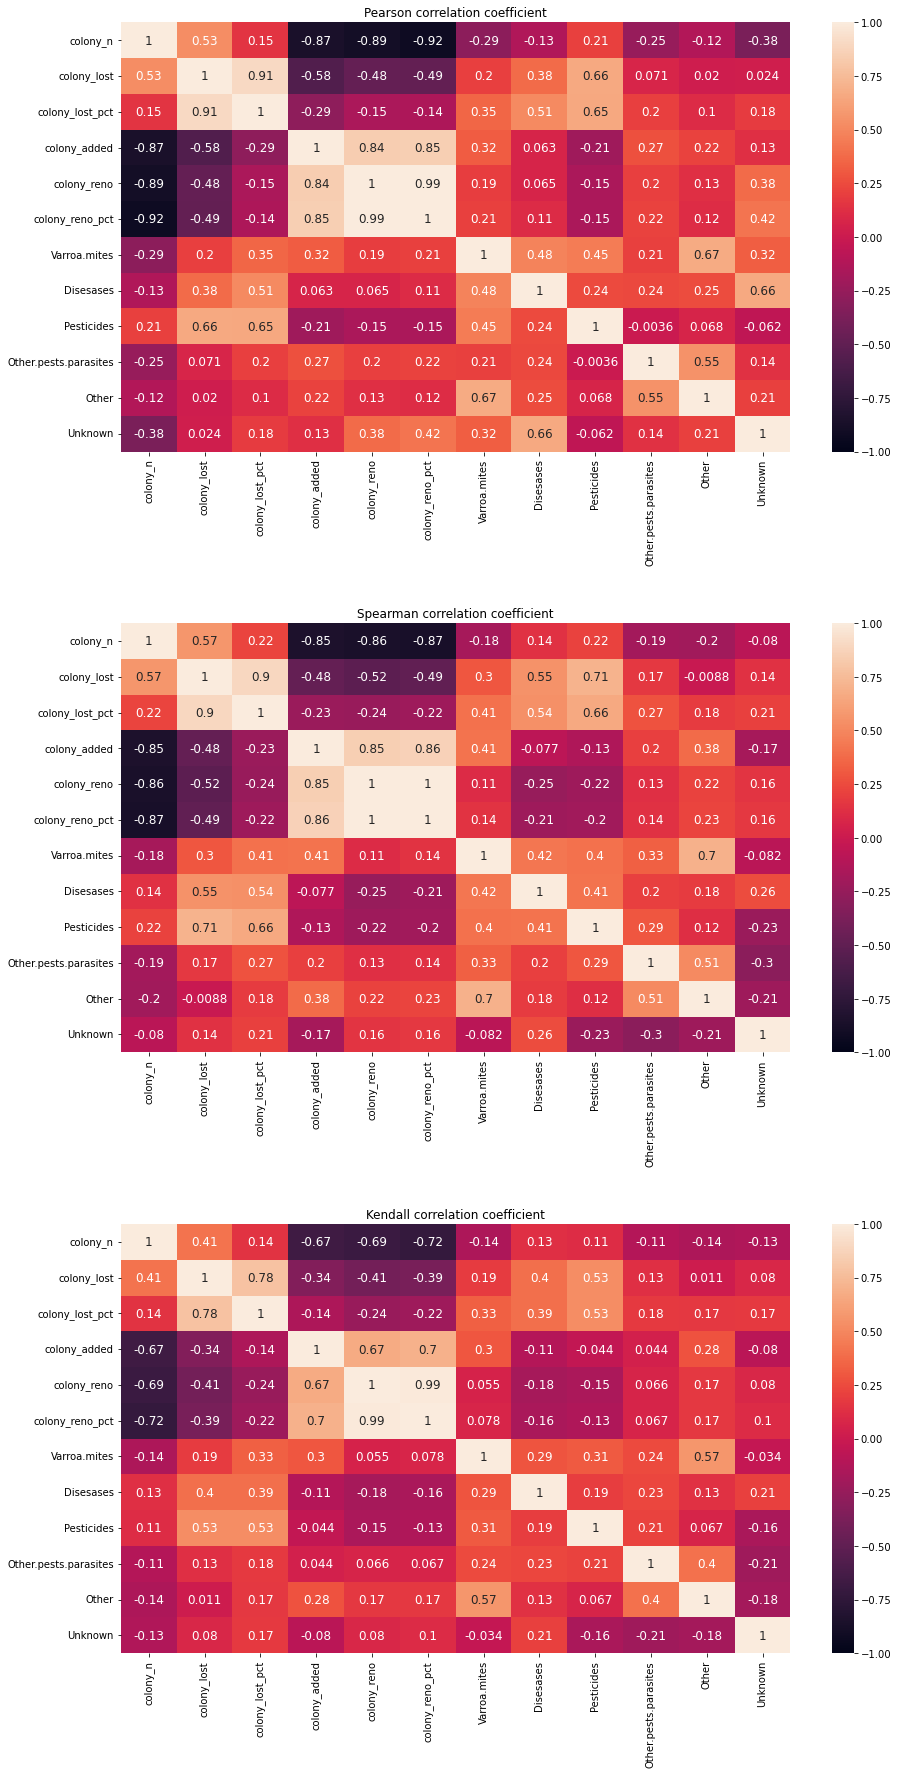

In [44]:
fig, ax = plt.subplots(3, 1, figsize=(15, 30))
plt.subplots_adjust(hspace=0.4)
sns.heatmap(df_US_summer.corr(), annot=True, vmin=-1, vmax=1, ax=ax[0])
ax[0].set_title('Pearson correlation coefficient')
sns.heatmap(df_US_summer.corr(method="spearman"), annot=True, vmin=-1, vmax=1, ax=ax[1])
ax[1].set_title("Spearman correlation coefficient")
sns.heatmap(df_US_summer.corr(method="kendall"), annot=True, vmin=-1, vmax=1, ax=ax[2])
ax[2].set_title('Kendall correlation coefficient')
plt.show()

Text(0.5, 0.98, 'Percentage of colony loss in US')

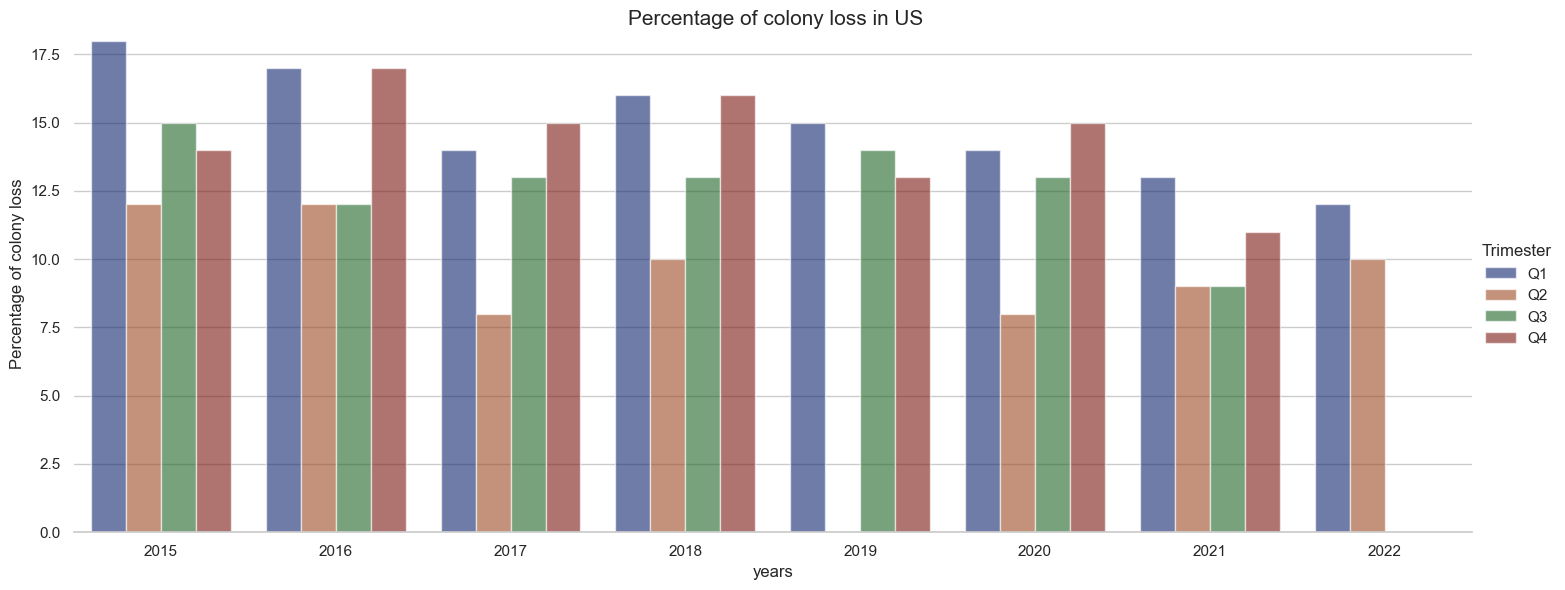

In [47]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_US.reset_index(), kind="bar",
    x="year", y="colony_lost_pct", hue="months", palette="dark", alpha=.6, height=6, aspect=2.5
) #palette=["k", "b"]
g.despine(left=True)
g.set_axis_labels("years", "Percentage of colony loss")
g.legend.set_title("Trimester")
g.fig.suptitle("Percentage of colony loss in US")

## Missing values (not needed now)

In [48]:
'''
fig, (ax) = plt.subplots(figsize=(10,20))
fig.suptitle('Missing Values')
sns.heatmap(df_years.isnull(), cbar=False, ax=ax)
'''

"\nfig, (ax) = plt.subplots(figsize=(10,20))\nfig.suptitle('Missing Values')\nsns.heatmap(df_years.isnull(), cbar=False, ax=ax)\n"

In [50]:
'''
df_years.dropna(axis=0, how="all", inplace=True)
#df.iloc[:,3:] = df.iloc[:,3:].dropna(axis=0, how="all")
df = df.dropna(axis = 0, thresh = 4)
#df.iloc[790:820,3:].isnull().values.any()

df_years[["colony_added", "colony_reno"]] = df_years[["colony_added", "colony_reno"]].fillna(value = 0, inplace=False)
df[["colony_added", "colony_reno"]] = df[["colony_added", "colony_reno"]].fillna(value = 0, inplace=False)

'''

'\ndf_years.dropna(axis=0, how="all", inplace=True)\n#df.iloc[:,3:] = df.iloc[:,3:].dropna(axis=0, how="all")\ndf = df.dropna(axis = 0, thresh = 4)\n#df.iloc[790:820,3:].isnull().values.any()\n\ndf_years[["colony_added", "colony_reno"]] = df_years[["colony_added", "colony_reno"]].fillna(value = 0, inplace=False)\ndf[["colony_added", "colony_reno"]] = df[["colony_added", "colony_reno"]].fillna(value = 0, inplace=False)\n\n'

# Data Exploration

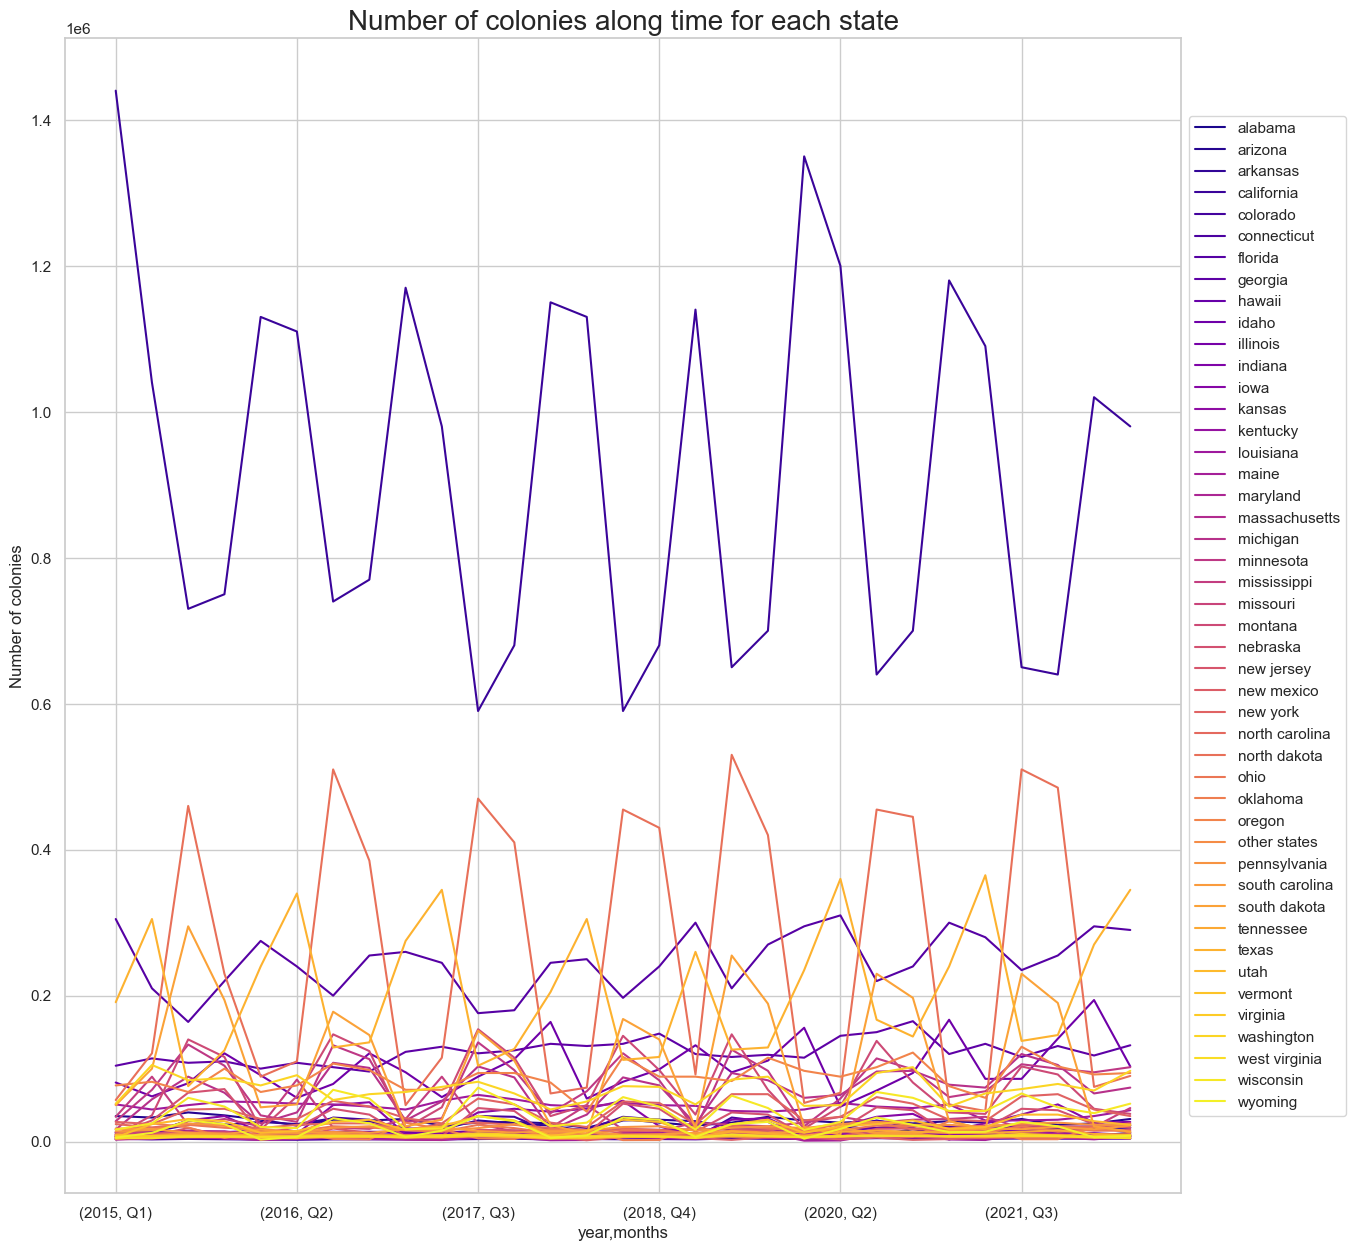

In [51]:
fig, ax = plt.subplots(figsize=(16,15))
plt.title('Number of colonies along time for each state', fontsize=20)
plt.ylabel('Number of colonies')
df_years["colony_n"].unstack().plot(ax=ax,color=custom_states)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#The state with the highest number of colonies is California

In [ ]:
df["season"] = df["months"].apply(lambda x: "Winter" if x == "Q1" or x == "Q4" else "Summer")
#in this case, I considered Q4 2015 as Winter 2015, while it should be Winter 2016 together with Q1 2016
df["year_revisited"] = df.apply(lambda row: row.year + 1 if row.months == "Q4" else row.year, axis=1)
df.head(200)

In [53]:
cols_temp = ["year_revisited", "season", "state", "colony_lost_pct"]
df_temp = df.loc[:,cols_temp]
df_temp = df_temp.groupby(["year_revisited", "season"]).mean()
display(df_temp)

'''
cols_temp = ["year", "season", "state", "colony_lost_pct"]
df_temp2 = df.loc[:,cols_temp]
df_temp2 = df_temp2.groupby(["year", "season"]).mean()
df_temp2
'''

colony_lost_pct
year_revisited season                 
2015           Summer        10.086957
               Winter        17.913043
2016           Summer         9.847826
               Winter        12.010870
2017           Summer         9.695652
               Winter        13.032609
2018           Summer         9.891304
               Winter        14.217391
2019           Summer        10.978261
               Winter        12.967391
2020           Summer        10.021739
               Winter        11.576087
2021           Summer         8.630435
               Winter        11.641304
2022           Summer         7.804348
               Winter        10.565217

'\ncols_temp = ["year", "season", "state", "colony_lost_pct"]\ndf_temp2 = df.loc[:,cols_temp]\ndf_temp2 = df_temp2.groupby(["year", "season"]).mean()\ndf_temp2\n'

'\n#create your own color array\nmy_colors = ["#9b59b6", "#3498db", \n             "#2ecc71", "#006a4e"]\n  \n# add color array to set_palette\n# function of seaborn\nsns.set_palette(my_colors)\n'

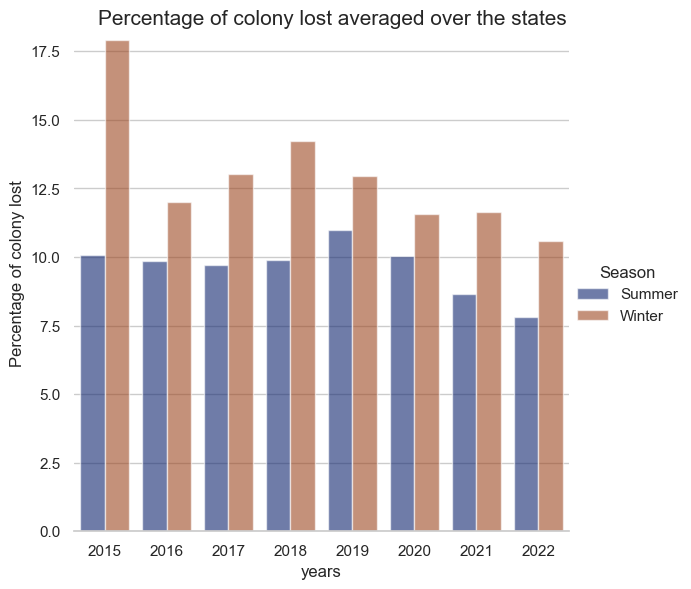

In [54]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_temp.reset_index(), kind="bar",
    x="year_revisited", y="colony_lost_pct", hue="season", palette="dark", alpha=.6, height=6
) #palette=["k", "b"]
g.despine(left=True)
g.set_axis_labels("years", "Percentage of colony lost")
g.legend.set_title("Season")
g.fig.suptitle("Percentage of colony lost averaged over the states")

'''
#create your own color array
my_colors = ["#9b59b6", "#3498db", 
             "#2ecc71", "#006a4e"]
  
# add color array to set_palette
# function of seaborn
sns.set_palette(my_colors)
'''

In [55]:
df.head()

year months       state   colony_n  colony_max  colony_lost  \
0  2015     Q1     alabama     7000.0      7000.0       1800.0   
1  2015     Q1     arizona    35000.0     35000.0       4600.0   
2  2015     Q1    arkansas    13000.0     14000.0       1500.0   
3  2015     Q1  california  1440000.0   1690000.0     255000.0   
4  2015     Q1    colorado     3500.0     12500.0       1500.0   

   colony_lost_pct  colony_added  colony_reno  colony_reno_pct  Varroa.mites  \
0               26          2800        250.0                4          10.0   
1               13          3400       2100.0                6          26.9   
2               11          1200         90.0                1          17.6   
3               15        250000     124000.0                7          24.7   
4               12           200        140.0                1          14.6   

   Other.pests.parasites  Disesases  Pesticides  Other  Unknown  season  \
0                    5.4        0.0         2.2    9.1      9.4  Winter   
1                   20.5        0.1         0.0    1.8      3.1  Winter   
2                   11.4        1.5         3.4    1.0      1.0  Winter   
3                    7.2        3.0         7.5    6.5      2.8  Winter   
4                    0.9        1.8         0.6    2.6      5.9  Winter   

   year_revisited  
0            2015  
1            2015  
2            2015  
3            2015  
4            2015

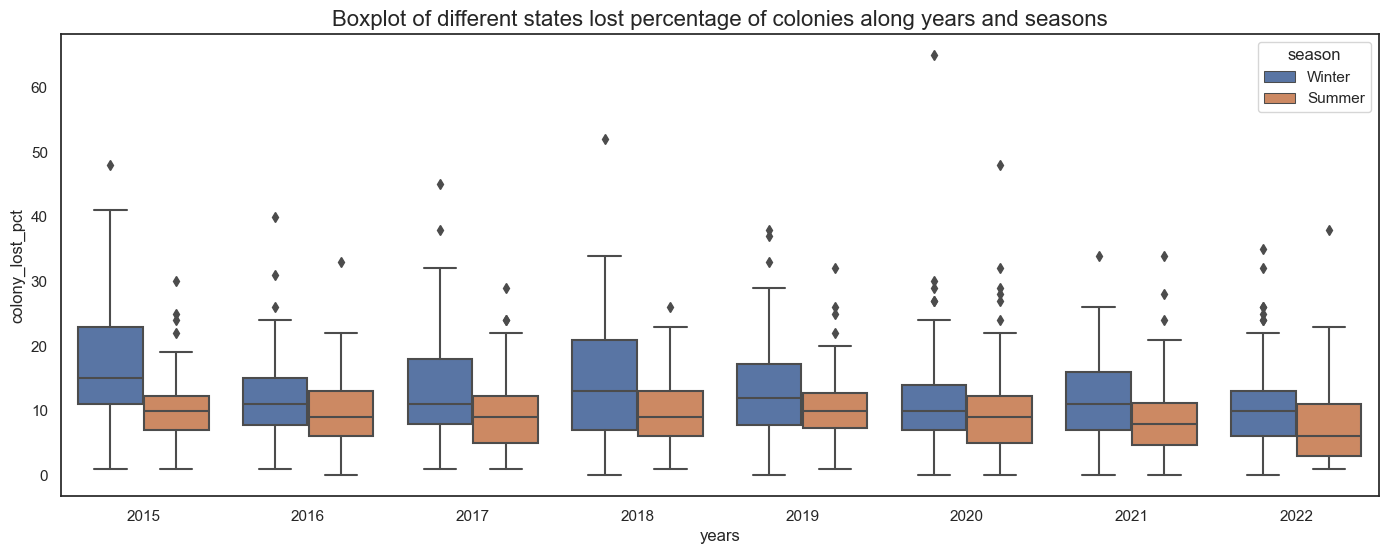

In [56]:
my_colors = ["#9b59b6", "#3498db"]
sns.set_palette(my_colors)
sns.set_theme(style="white")
plt.figure(figsize =(17, 6))
sns.boxplot(x = "year_revisited", y = "colony_lost_pct", data= df.loc[:,["year_revisited", "season", "colony_lost_pct"]], hue="season")
plt.title("Boxplot of different states lost percentage of colonies along years and seasons", fontsize=16)
plt.xlabel("years")
plt.show()

In [57]:
cols_temp = ["year_revisited", "state", "season", "colony_lost"]
df_temp2 = df.loc[:,cols_temp]
df_temp2 = df_temp2[df_temp2.state != "california"]
df_temp2.head() #NO CALIFORNIA

year_revisited        state  season  colony_lost
0            2015      alabama  Winter       1800.0
1            2015      arizona  Winter       4600.0
2            2015     arkansas  Winter       1500.0
4            2015     colorado  Winter       1500.0
5            2015  connecticut  Winter        870.0

In [58]:
np.where(df_temp2.colony_lost > 80000)[0][0]
df_temp2.iloc[118,:] #NORTH DAKOTA PROBLEM

year_revisited            2015
state             north dakota
season                  Summer
colony_lost            93000.0
Name: 121, dtype: object

In [59]:
df_temp2 = df_temp2[df_temp2.state != "north dakota"]

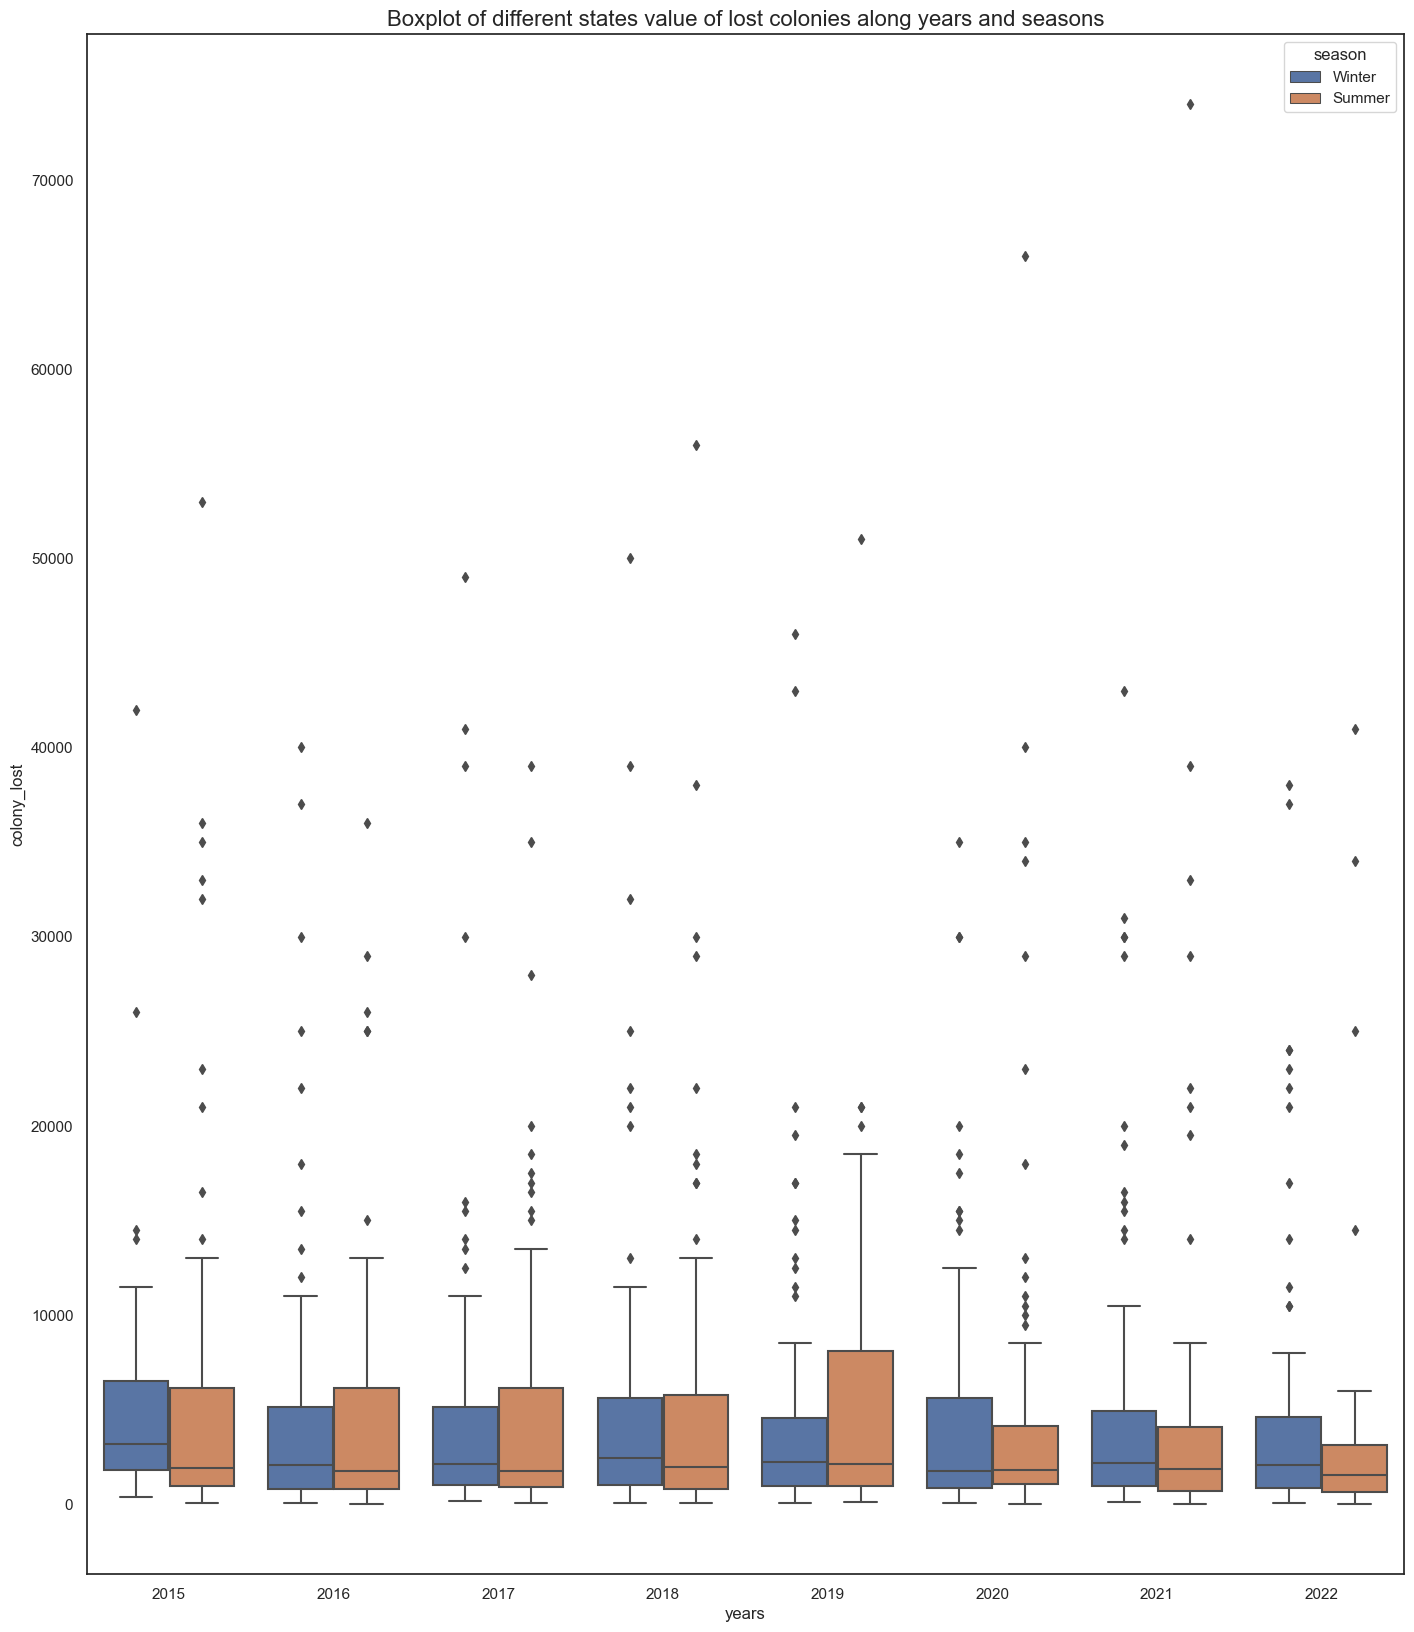

In [60]:
my_colors = ["#9b59b6", "#3498db"]
sns.set_palette(my_colors)
sns.set_theme(style="white")
plt.figure(figsize =(17, 20))
sns.boxplot(x = "year_revisited", y = "colony_lost", data=df_temp2, hue="season") #Without California and North Dakota
plt.title("Boxplot of different states value of lost colonies along years and seasons", fontsize=16)
plt.xlabel("years")
plt.show()

In [ ]:
cols_temp = ["year_revisited", "season", "state", "colony_lost_pct"]
df_temp3 = df.loc[:,cols_temp]
df_temp3 = df_temp3.groupby(["year_revisited", "state", "season"]).mean()
#df_temp3.reset_index()
df_temp3.head(200)
#df_temp3.to_csv("df_season.csv")

In [62]:
sns.set_theme()

sns.relplot(data = df_temp3, kind ='line', x ="year_revisited", y ="colony_lost_pct", row ="state", hue = "season",
            legend = True, facet_kws=dict(sharex=False, sharey=False), height = 7, aspect=4)
#height: altezza each subplot
#height*aspect = larghezza each subplot

plt.show()

In [63]:
df_US.head()

colony_n  colony_lost  colony_lost_pct  colony_added  \
year months                                                         
2015 Q1       2824610       500020               18        546980   
     Q2       2849500       352860               12        661860   
     Q3       3132880       457100               15        172990   
     Q4       2874760       412380               14        117150   
2016 Q1       2594590       428800               17        378160   

             colony_reno  colony_reno_pct  Varroa.mites  \
year months                                               
2015 Q1           270530               10          25.2   
     Q2           692850               24          43.4   
     Q3           303070               10          41.2   
     Q4           158790                6          37.0   
2016 Q1           158050                6          34.3   

             Other.pests.parasites  Disesases  Pesticides  Other  Unknown  
year months                                                                
2015 Q1                        8.6        3.1         7.4    6.9      4.3  
     Q2                       19.5        4.9        16.6   11.6      3.5  
     Q3                       17.6        8.0        15.2    8.8      4.8  
     Q4                       11.4        5.2         9.5    7.3      6.9  
2016 Q1                       12.6        6.2        10.5    7.0      5.4

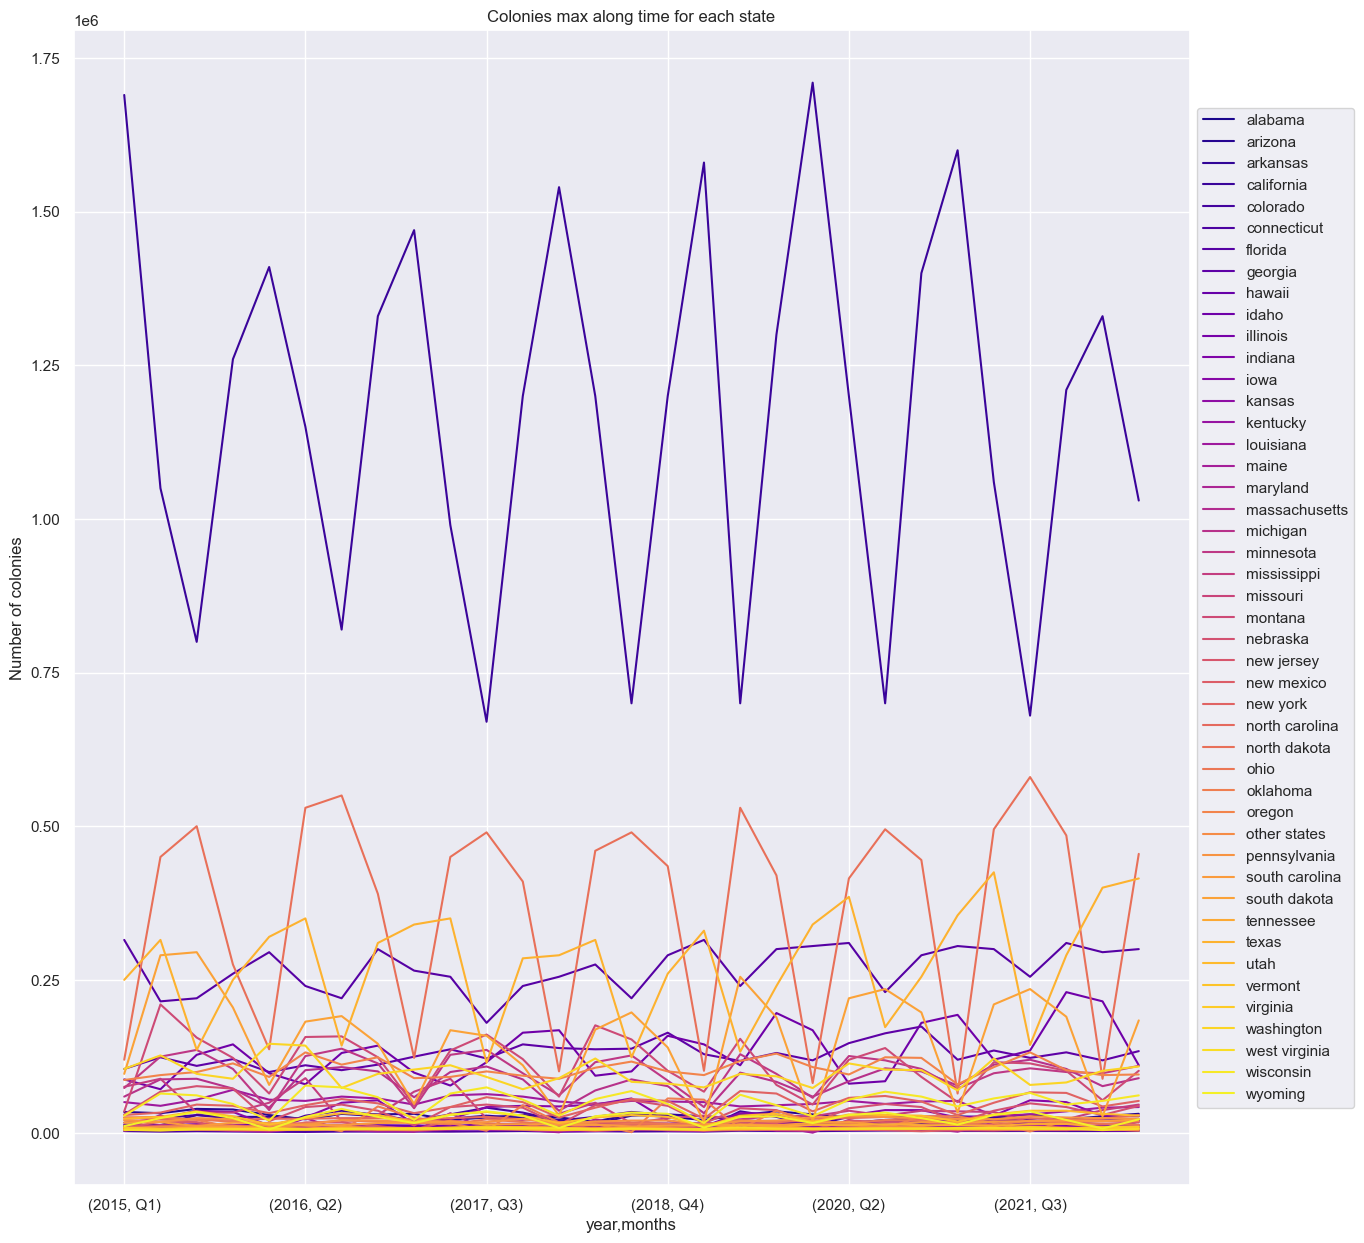

In [64]:
fig, ax = plt.subplots(figsize=(16,15))
plt.title('Colonies max along time for each state')
plt.ylabel('Number of colonies')
df_years["colony_max"].unstack().plot(ax=ax,color=custom_states)

# Shrink current axis by 10%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [65]:
df_years = df.groupby(["year", "months", "state", "season"]).sum()
df_years.head()


colony_n  colony_max  colony_lost  \
year months state      season                                       
2015 Q1     alabama    Winter     7000.0      7000.0       1800.0   
            arizona    Winter    35000.0     35000.0       4600.0   
            arkansas   Winter    13000.0     14000.0       1500.0   
            california Winter  1440000.0   1690000.0     255000.0   
            colorado   Winter     3500.0     12500.0       1500.0   

                               colony_lost_pct  colony_added  colony_reno  \
year months state      season                                               
2015 Q1     alabama    Winter               26          2800        250.0   
            arizona    Winter               13          3400       2100.0   
            arkansas   Winter               11          1200         90.0   
            california Winter               15        250000     124000.0   
            colorado   Winter               12           200        140.0   

                               colony_reno_pct  Varroa.mites  \
year months state      season                                  
2015 Q1     alabama    Winter                4          10.0   
            arizona    Winter                6          26.9   
            arkansas   Winter                1          17.6   
            california Winter                7          24.7   
            colorado   Winter                1          14.6   

                               Other.pests.parasites  Disesases  Pesticides  \
year months state      season                                                 
2015 Q1     alabama    Winter                    5.4        0.0         2.2   
            arizona    Winter                   20.5        0.1         0.0   
            arkansas   Winter                   11.4        1.5         3.4   
            california Winter                    7.2        3.0         7.5   
            colorado   Winter                    0.9        1.8         0.6   

                               Other  Unknown  year_revisited  
year months state      season                                  
2015 Q1     alabama    Winter    9.1      9.4            2015  
            arizona    Winter    1.8      3.1            2015  
            arkansas   Winter    1.0      1.0            2015  
            california Winter    6.5      2.8            2015  
            colorado   Winter    2.6      5.9            2015

In [ ]:
years = df_years.index.get_level_values(0)
months = df_years.index.get_level_values(1)
indices = list(zip(years, months))
indices

In [ ]:
sns.set_theme()

sns.relplot(data = df_years, kind ='line', x = indices, y ="colony_lost_pct", row ="state", hue = "season",
            legend = True, facet_kws=dict(sharex=False, sharey=False), height = 7, aspect=4)
#height: altezza each subplot
#height*aspect = larghezza each subplot

plt.show()

In [68]:
df_years.head()

colony_n  colony_max  colony_lost  \
year months state      season                                       
2015 Q1     alabama    Winter     7000.0      7000.0       1800.0   
            arizona    Winter    35000.0     35000.0       4600.0   
            arkansas   Winter    13000.0     14000.0       1500.0   
            california Winter  1440000.0   1690000.0     255000.0   
            colorado   Winter     3500.0     12500.0       1500.0   

                               colony_lost_pct  colony_added  colony_reno  \
year months state      season                                               
2015 Q1     alabama    Winter               26          2800        250.0   
            arizona    Winter               13          3400       2100.0   
            arkansas   Winter               11          1200         90.0   
            california Winter               15        250000     124000.0   
            colorado   Winter               12           200        140.0   

                               colony_reno_pct  Varroa.mites  \
year months state      season                                  
2015 Q1     alabama    Winter                4          10.0   
            arizona    Winter                6          26.9   
            arkansas   Winter                1          17.6   
            california Winter                7          24.7   
            colorado   Winter                1          14.6   

                               Other.pests.parasites  Disesases  Pesticides  \
year months state      season                                                 
2015 Q1     alabama    Winter                    5.4        0.0         2.2   
            arizona    Winter                   20.5        0.1         0.0   
            arkansas   Winter                   11.4        1.5         3.4   
            california Winter                    7.2        3.0         7.5   
            colorado   Winter                    0.9        1.8         0.6   

                               Other  Unknown  year_revisited  
year months state      season                                  
2015 Q1     alabama    Winter    9.1      9.4            2015  
            arizona    Winter    1.8      3.1            2015  
            arkansas   Winter    1.0      1.0            2015  
            california Winter    6.5      2.8            2015  
            colorado   Winter    2.6      5.9            2015

In [ ]:
fig, ax = plt.subplots(figsize=(16,15))
plt.title('varroa along time for each state')
plt.ylabel('Percentage of colonies affected')
df_years["Varroa.mites"].unstack().plot(ax=ax,color=custom_states)

# Shrink current axis by 10%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [70]:
indices = df_years[df_years["Varroa.mites"]>80].index.get_level_values(2).unique()
states = indices.tolist()
states

['arkansas',
 'maine',
 'arizona',
 'new mexico',
 'hawaii',
 'massachusetts',
 'vermont',
 'missouri',
 'idaho',
 'michigan',
 'kansas',
 'mississippi',
 'south dakota']

In [ ]:

fig, ax = plt.subplots(figsize=(16,15))
plt.title('colony lost pct along time')
plt.ylabel('Percentage of colonies lost')
df_years.loc[(slice(None), slice(None), states),"colony_lost_pct"].unstack().plot(ax=ax)

# Shrink current axis by 10%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
df_varroahigh = df_years.loc[(slice(None), slice(None), states),"colony_lost_pct"]

In [ ]:
df_varroahigh[df_varroahigh>40]
states_2 = ["new mexico", "missouri"]

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(16,15))
ax[1].set_title('colony lost pct along time')
ax[0].set_title('varroa along time')
plt.ylabel('Percentage of colonies')
df_years.loc[(slice(None), slice(None), states_2),"Varroa.mites"].unstack().plot(ax=ax[0])
df_years.loc[(slice(None), slice(None), states_2),"colony_lost_pct"].unstack().plot(ax=ax[1])
ax[0].xaxis.set_major_locator(MultipleLocator(1))
ax[1].xaxis.set_major_locator(MultipleLocator(1))

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Varroa and colony lost pct in New Mexico along time', fontsize=20)
plt.ylabel('Percentage of colonies (%)')
df_years.loc[(slice(None), slice(None), "new mexico"),"Varroa.mites"].unstack().plot(ax=ax)
df_years.loc[(slice(None), slice(None), "new mexico"),"colony_lost_pct"].unstack().plot(ax=ax)
plt.legend(['Varroa', 'Colony lost percentage'], prop={'size': 15})
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.savefig("plots/varroa_lost_newmexico.pdf")

# Geospatial Representation

In [ ]:
'''
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pathlib
import mapclassify as mc

pip install pysal

path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)

'''

# Survival

In [71]:
df.head()

year months       state   colony_n  colony_max  colony_lost  \
0  2015     Q1     alabama     7000.0      7000.0       1800.0   
1  2015     Q1     arizona    35000.0     35000.0       4600.0   
2  2015     Q1    arkansas    13000.0     14000.0       1500.0   
3  2015     Q1  california  1440000.0   1690000.0     255000.0   
4  2015     Q1    colorado     3500.0     12500.0       1500.0   

   colony_lost_pct  colony_added  colony_reno  colony_reno_pct  Varroa.mites  \
0               26          2800        250.0                4          10.0   
1               13          3400       2100.0                6          26.9   
2               11          1200         90.0                1          17.6   
3               15        250000     124000.0                7          24.7   
4               12           200        140.0                1          14.6   

   Other.pests.parasites  Disesases  Pesticides  Other  Unknown  season  \
0                    5.4        0.0         2.2    9.1      9.4  Winter   
1                   20.5        0.1         0.0    1.8      3.1  Winter   
2                   11.4        1.5         3.4    1.0      1.0  Winter   
3                    7.2        3.0         7.5    6.5      2.8  Winter   
4                    0.9        1.8         0.6    2.6      5.9  Winter   

   year_revisited  
0            2015  
1            2015  
2            2015  
3            2015  
4            2015

In [72]:
df_states = df.groupby(["state", "year", "months"]).sum()
df_states["colony_end_computed"] = df_states.colony_n + df_states.colony_added - df_states.colony_lost #o colony_max ??
df_states.head()

colony_n  colony_max  colony_lost  colony_lost_pct  \
state   year months                                                       
alabama 2015 Q1        7000.0      7000.0       1800.0               26   
             Q2        7500.0      7500.0        860.0               12   
             Q3        8500.0      9000.0       1400.0               16   
             Q4        8000.0      8000.0        610.0                8   
        2016 Q1        7500.0      7500.0       1700.0               23   

                     colony_added  colony_reno  colony_reno_pct  Varroa.mites  \
state   year months                                                             
alabama 2015 Q1              2800        250.0                4          10.0   
             Q2              1900        680.0                9          16.7   
             Q3               160        260.0                3          63.1   
             Q4                80         60.0                1           3.1   
        2016 Q1              2100         90.0                1          24.2   

                     Other.pests.parasites  Disesases  Pesticides  Other  \
state   year months                                                        
alabama 2015 Q1                        5.4        0.0         2.2    9.1   
             Q2                       42.5        0.0         2.3    3.2   
             Q3                       70.6        0.0         2.6    2.2   
             Q4                        6.4        0.2         0.2    2.8   
        2016 Q1                       22.0        4.3         8.1    2.4   

                     Unknown  year_revisited  colony_end_computed  
state   year months                                                
alabama 2015 Q1          9.4            2015               8000.0  
             Q2          4.1            2015               8540.0  
             Q3         17.7            2015               7260.0  
             Q4          1.9            2016               7470.0  
        2016 Q1         11.3            2016               7900.0

In [73]:
df_states2 = df_states[["colony_n", "colony_end_computed"]]
df_states2.head()

colony_n  colony_end_computed
state   year months                               
alabama 2015 Q1        7000.0               8000.0
             Q2        7500.0               8540.0
             Q3        8500.0               7260.0
             Q4        8000.0               7470.0
        2016 Q1        7500.0               7900.0

In [74]:
df_states2["percentage end colonies"] = (df_states2.colony_end_computed - df_states2.colony_n)/df_states2.colony_n
df_states2.head()

colony_n  colony_end_computed  percentage end colonies
state   year months                                                        
alabama 2015 Q1        7000.0               8000.0                 0.142857
             Q2        7500.0               8540.0                 0.138667
             Q3        8500.0               7260.0                -0.145882
             Q4        8000.0               7470.0                -0.066250
        2016 Q1        7500.0               7900.0                 0.053333

In [75]:
df_states2['cumulative percentage'] = df_states2.groupby(['state'])['percentage end colonies'].transform('cumsum')

In [76]:
df_states2.head(100)

colony_n  colony_end_computed  \
state      year months                                   
alabama    2015 Q1         7000.0               8000.0   
                Q2         7500.0               8540.0   
                Q3         8500.0               7260.0   
                Q4         8000.0               7470.0   
           2016 Q1         7500.0               7900.0   
                Q2         8000.0               8270.0   
                Q3         8000.0               7240.0   
                Q4         7000.0               6440.0   
           2017 Q1         7000.0               5970.0   
                Q2         6500.0               7260.0   
                Q3         7000.0               6790.0   
                Q4         7500.0               7060.0   
           2018 Q1         7500.0               7880.0   
                Q2         7000.0               8050.0   
                Q3         8500.0               8400.0   
                Q4         6500.0               5880.0   
           2019 Q1         5500.0               5650.0   
                Q3         7000.0               6170.0   
                Q4         6000.0               5580.0   
           2020 Q1         5500.0               6990.0   
                Q2         8500.0               9100.0   
                Q3         9000.0               7100.0   
                Q4        17000.0              16650.0   
           2021 Q1        10000.0               9570.0   
                Q2         9500.0              10200.0   
                Q3         9500.0               9050.0   
                Q4         9000.0               8260.0   
           2022 Q1         8000.0               8500.0   
                Q2        12000.0              15300.0   
arizona    2015 Q1        35000.0              33800.0   
                Q2        33000.0              47000.0   
                Q3        40000.0              38300.0   
                Q4        36000.0              27000.0   
           2016 Q1        30000.0              28800.0   
                Q2        22000.0              32300.0   
                Q3        30000.0              27200.0   
                Q4        29000.0              27100.0   
           2017 Q1        31000.0              27900.0   
                Q2        22000.0              31900.0   
                Q3        26000.0              26900.0   
                Q4        27000.0              21800.0   
           2018 Q1        25000.0              19810.0   
                Q2        19000.0              30400.0   
                Q3        31000.0              26200.0   
                Q4        26000.0              23200.0   
           2019 Q1        22000.0              19930.0   
                Q3        26000.0              29500.0   
                Q4        34000.0              27300.0   
           2020 Q1        29000.0              23500.0   
                Q2        26000.0              39200.0   
                Q3        28000.0              22600.0   
                Q4        25000.0              26500.0   
           2021 Q1        28000.0              26000.0   
                Q2        26000.0              33700.0   
                Q3        31000.0              26500.0   
                Q4        23000.0              25000.0   
           2022 Q1        25000.0              27400.0   
                Q2        31000.0              45400.0   
arkansas   2015 Q1        13000.0              12700.0   
                Q2        13500.0              23100.0   
                Q3        23000.0              14500.0   
                Q4        23000.0              22500.0   
           2016 Q1        27000.0              27000.0   
                Q2        24000.0              32600.0   
                Q3        32000.0              30770.0   
                Q4        28000.0              25520.0   
           2017 Q1        18000.0              14930.0   
                Q2     

In [77]:
df_survival = df_states2[df_states2["cumulative percentage"] < -0.10]

In [78]:
len(df_survival.index.get_level_values(0).unique().tolist()) #number of states which "die" before 2022-Q2

34

In [79]:
df_survival.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 398 entries, ('alabama', 2017, 'Q1') to ('wisconsin', 2022, 'Q2')
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   colony_n                 398 non-null    float64
 1   colony_end_computed      398 non-null    float64
 2   percentage end colonies  398 non-null    float64
 3   cumulative percentage    398 non-null    float64
dtypes: float64(4)
memory usage: 14.2+ KB


In [80]:
df_survival["cumulative percentage"] = df_survival["cumulative percentage"].round(4)

In [81]:
#df_survival.to_csv(start_path + "/data/new_data/df_survival.csv")

In [82]:
df_survival.head(100)

colony_n  colony_end_computed  \
state       year months                                   
alabama     2017 Q1         7000.0               5970.0   
                 Q4         7500.0               7060.0   
            2019 Q3         7000.0               6170.0   
                 Q4         6000.0               5580.0   
            2021 Q1        10000.0               9570.0   
                 Q3         9500.0               9050.0   
                 Q4         9000.0               8260.0   
            2022 Q1         8000.0               8500.0   
california  2015 Q4       750000.0             640000.0   
            2016 Q1      1130000.0            1140000.0   
                 Q4       770000.0             605000.0   
            2017 Q1      1170000.0            1112000.0   
                 Q2       980000.0            1050000.0   
                 Q3       590000.0             596000.0   
                 Q4       680000.0             615000.0   
            2018 Q1      1150000.0            1140000.0   
                 Q2      1130000.0            1192000.0   
                 Q3       590000.0             580000.0   
                 Q4       680000.0             596000.0   
            2019 Q1      1140000.0             988000.0   
                 Q3       650000.0             644000.0   
                 Q4       700000.0             724000.0   
            2020 Q1      1350000.0            1360000.0   
                 Q2      1200000.0            1275000.0   
                 Q3       640000.0             632000.0   
                 Q4       700000.0             656000.0   
            2021 Q1      1180000.0            1094000.0   
                 Q2      1090000.0            1141000.0   
                 Q3       650000.0             672000.0   
                 Q4       640000.0             605000.0   
            2022 Q1      1020000.0             996000.0   
                 Q2       980000.0            1052000.0   
colorado    2015 Q1         3500.0               2200.0   
                 Q3        29000.0              25900.0   
connecticut 2015 Q1         3900.0               3320.0   
idaho       2016 Q1        91000.0              88000.0   
                 Q4       121000.0             110500.0   
            2017 Q1        95000.0              88500.0   
            2018 Q1       164000.0             144500.0   
            2019 Q1       132000.0             124100.0   
                 Q3        95000.0              93000.0   
                 Q4       111000.0              97300.0   
            2020 Q1       156000.0             141900.0   
                 Q2        48000.0              52000.0   
                 Q3        70000.0              77500.0   
                 Q4        94000.0              83000.0   
            2021 Q1       167000.0             163500.0   
                 Q4       141000.0             119250.0   
            2022 Q1       194000.0             193500.0   
illinois    2015 Q1         6000.0               4100.0   
indiana     2015 Q1         9000.0               7390.0   
iowa        2015 Q1        12500.0              11100.0   
            2016 Q1        13000.0              10190.0   
kansas      2015 Q1         4600.0               3450.0   
                 Q4         8500.0               5150.0   
            2016 Q1         5000.0               5300.0   
                 Q3         8000.0               5710.0   
                 Q4         5000.0               3900.0   
            2017 Q1         3800.0               3730.0   
            2018 Q1         3700.0               3120.0   
            2019 Q4         4800.0               4340.0   
            2021 Q1         5000.0               4600.0   
                 Q4         8000.0               6040.0   
            2022 Q1         5000.0               4620.0   
kentucky    2015 Q1         7500.0               3650.0   
                 Q2         7500.0              10120.0   
              

In [ ]:
df_survival.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 311 entries, ('alabama', 2019, 'Q4') to ('wisconsin', 2022, 'Q2')
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   colony_n                 311 non-null    float64
 1   colony_end_computed      311 non-null    float64
 2   percentage end colonies  311 non-null    float64
 3   cumulative percentage    311 non-null    float64
dtypes: float64(4)
memory usage: 11.2+ KB


In [84]:
df_states.index.get_level_values(0).unique()

Index(['alabama', 'arizona', 'arkansas', 'california', 'colorado',
       'connecticut', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois',
       'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maine',
       'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi',
       'missouri', 'montana', 'nebraska', 'new jersey', 'new mexico',
       'new york', 'north carolina', 'north dakota', 'ohio', 'oklahoma',
       'oregon', 'other states', 'pennsylvania', 'south carolina',
       'south dakota', 'tennessee', 'texas', 'utah', 'vermont', 'virginia',
       'washington', 'west virginia', 'wisconsin', 'wyoming'],
      dtype='object', name='state')